# 데이터 수집 및 전처리
### 모든 데이터는 상권 영역(상권_코드, 상권_코드_명) 기준으로 전처리 및 결합

### [활용 데이터]

- [상권영역] 서울시 상권분석서비스(영역-상권) 2023.10월 기준
https://data.seoul.go.kr/dataList/OA-15560/S/1/datasetView.do

- [개폐업 수] 서울시 상권분석서비스(점포-상권),
[프랜차이즈 수] 서울시 상권분석서비스(점포-상권) 2019~2022 기준
https://data.seoul.go.kr/dataList/OA-15577/S/1/datasetView.do

- [매출금액] 서울시 상권분석서비스(추정매출-상권) 2019~2022 기준
https://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do

- [길단위인구 수] 서울시 상권분석서비스(길단위인구-상권) 2019~2022 기준
https://data.seoul.go.kr/dataList/OA-15568/S/1/datasetView.do

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# 한글 폰트 깨짐 현상 해결
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus']=False

## 상권영역 데이터 분포 확인
- 서울시 상권영역: 1650개 (2023년 기준)


In [3]:
# 파일 읽어오기, 한글csv file이므로 encoding cp949
commer_district = pd.read_csv('commer_district.csv', encoding='cp949')
commer_district

상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  엑스좌표_값  와이좌표_값  \
0           A       골목상권  3110008         배화여자대학교(박노수미술관)  197093  453418   
1           A       골목상권  3110009                   자하문터널  196991  455057   
2           A       골목상권  3110010                   평창동서측  197064  456643   
3           A       골목상권  3110017                   정독도서관  198581  453781   
4           A       골목상권  3110018                  중앙고등학교  198883  453690   
...       ...        ...      ...                     ...     ...     ...   
1645        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구  198397  451614   
1646        U       관광특구  3001493            동대문패션타운 관광특구  200996  451976   
1647        U       관광특구  3001494              종로?청계 관광특구  199796  452274   
1648        U       관광특구  3001495                 잠실 관광특구  210188  446334   
1649        U       관광특구  3001496             강남 마이스 관광특구  205282  445736   

      자치구_코드 자치구_코드_명    행정동_코드     행정동_코드_명    영역_면적  
0      11110      종로구  11110515        청운효자동   149264  
1      11110      종로구  11110550          부암동   178306  
2      11110      종로구  11110560          평창동   369415  
3      11110      종로구  11110600          가회동    83855  
4      11110      종로구  11110600          가회동   166872  
...      ...      ...       ...          ...      ...  
1645   11140       중구  11140520          소공동   983618  
1646   11140       중구  11140590          광희동   606058  
1647   11110      종로구  11110615  종로1?2?3?4가동   653127  
1648   11710      송파구  11710562         방이2동  2462734  
1649   11680      강남구  11680580         삼성1동   237892  

[1650 rows x 11 columns]

In [4]:
commer_district_sigakhwa = commer_district.copy()
commer_district_sigakhwa

상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  엑스좌표_값  와이좌표_값  \
0           A       골목상권  3110008         배화여자대학교(박노수미술관)  197093  453418   
1           A       골목상권  3110009                   자하문터널  196991  455057   
2           A       골목상권  3110010                   평창동서측  197064  456643   
3           A       골목상권  3110017                   정독도서관  198581  453781   
4           A       골목상권  3110018                  중앙고등학교  198883  453690   
...       ...        ...      ...                     ...     ...     ...   
1645        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구  198397  451614   
1646        U       관광특구  3001493            동대문패션타운 관광특구  200996  451976   
1647        U       관광특구  3001494              종로?청계 관광특구  199796  452274   
1648        U       관광특구  3001495                 잠실 관광특구  210188  446334   
1649        U       관광특구  3001496             강남 마이스 관광특구  205282  445736   

      자치구_코드 자치구_코드_명    행정동_코드     행정동_코드_명    영역_면적  
0      11110      종로구  11110515        청운효자동   149264  
1      11110      종로구  11110550          부암동   178306  
2      11110      종로구  11110560          평창동   369415  
3      11110      종로구  11110600          가회동    83855  
4      11110      종로구  11110600          가회동   166872  
...      ...      ...       ...          ...      ...  
1645   11140       중구  11140520          소공동   983618  
1646   11140       중구  11140590          광희동   606058  
1647   11110      종로구  11110615  종로1?2?3?4가동   653127  
1648   11710      송파구  11710562         방이2동  2462734  
1649   11680      강남구  11680580         삼성1동   237892  

[1650 rows x 11 columns]

In [5]:
# 상권_코드, 상권_코드_명 칼럼만 남기고 전부 삭제
commer_district.drop(commer_district.columns[4:11], axis=1, inplace=True)
commer_district.drop(commer_district.columns[0:2], axis=1, inplace=True)

# 합친 파일 저장
commer_district.to_csv('commer_district_after.csv')
commer_district

상권_코드                 상권_코드_명
0     3110008         배화여자대학교(박노수미술관)
1     3110009                   자하문터널
2     3110010                   평창동서측
3     3110017                   정독도서관
4     3110018                  중앙고등학교
...       ...                     ...
1645  3001492  명동 남대문 북창동 다동 무교동 관광특구
1646  3001493            동대문패션타운 관광특구
1647  3001494              종로?청계 관광특구
1648  3001495                 잠실 관광특구
1649  3001496             강남 마이스 관광특구

[1650 rows x 2 columns]

## 데이터 전처리 1
- 2019~2022 프랜차이즈수, 개폐업수 파일 합치기


In [6]:
# 프랜차이즈수, 개폐업수 파일 전부 읽어오기, 한글csv file이므로 encoding cp949
fran_openclose_2019 = pd.read_csv('fran_openclose_2019.csv', encoding='cp949')
fran_openclose_2020 = pd.read_csv('fran_openclose_2020.csv', encoding='cp949')
fran_openclose_2021 = pd.read_csv('fran_openclose_2021.csv', encoding='cp949')
fran_openclose_2022 = pd.read_csv('fran_openclose_2022.csv', encoding='cp949')
fran_openclose = pd.concat([fran_openclose_2019,fran_openclose_2020,fran_openclose_2021,fran_openclose_2022])

# # 상권_코드, 상권_코드_명 기준으로 결합해야하므로 필요없는 앞 열들은 삭제하기
# fran_openclose.drop(fran_openclose.columns[0:3], axis=1, inplace=True)

# 합친 파일 저장
fran_openclose.to_csv('fran_openclose.csv')
fran_openclose

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                      상권_코드_명  \
0           20191        R       전통시장  3130018         동대문문구완구거리(동대문문구완구시장)   
1           20191        D       발달상권  3120165               서래마을카페거리(서래마을)   
2           20191        D       발달상권  3120177                      신논현역 1번   
3           20191        A       골목상권  3110508                        서연중학교   
4           20191        A       골목상권  3110241                       먹골역 5번   
...           ...      ...        ...      ...                          ...   
304750      20224        A       골목상권  3110631                       방화초등학교   
304751      20224        A       골목상권  3110954                          국기원   
304752      20224        A       골목상권  3110687  천왕역 3번(오류2동주민센터, 서울오류남초등학교)   
304753      20224        R       전통시장  3130054                 황학동주방가구거리상점가   
304754      20224        A       골목상권  3110135                        성동세무서   

       서비스_업종_코드 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  \
0       CS300043      전자상거래업    10          10    10        1     0        0   
1       CS100007       치킨전문점     0           1     0        0   100        1   
2       CS300015          가방     3           3     0        0     0        0   
3       CS200041         사진관     6           6    17        1     0        0   
4       CS300036        조명용품     2           2     0        0     0        0   
...          ...         ...   ...         ...   ...      ...   ...      ...   
304750  CS200038         독서실     0           0     0        0     0        1   
304751  CS200010      변호사사무소     0           0     0        0     0        1   
304752  CS100008       분식전문점     0           0     0        0     0        1   
304753  CS200034          여관     0           0     0        0     0        1   
304754  CS200003        예술학원     0           0     0        0     0        1   

        프랜차이즈_점포_수  
0                0  
1                1  
2                0  
3                0  
4                0  
...            ...  
304750           0  
304751           0  
304752           0  
304753           0  
304754           0  

[1207982 rows x 14 columns]

## 데이터 전처리 2
- 2019~2022 매출액 파일 합치기


In [7]:
# 매출액 파일 전부 읽어오기, 한글csv file이므로 encoding cp949
money_2019 = pd.read_csv('money_2019.csv', encoding='cp949')
money_2020 = pd.read_csv('money_2020.csv', encoding='cp949')
money_2021 = pd.read_csv('money_2021.csv', encoding='cp949')
money_2022 = pd.read_csv('money_2022.csv', encoding='cp949')
money = pd.concat([money_2019,money_2020,money_2021,money_2022])

# # 상권_코드, 상권_코드_명 기준으로 결합해야하므로 필요없는 앞 열들은 삭제하기
# money.drop(money.columns[0:3], axis=1, inplace=True)

# 합친 파일 저장
money.to_csv('money.csv')
money

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
0          20191        D       발달상권  3120037              동대문역사문화공원역   
1          20191        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
2          20191        A       골목상권  3110085                  경리단길남측   
3          20191        A       골목상권  3110166                구의1동주민센터   
4          20191        A       골목상권  3110161                  중곡역 3번   
...          ...      ...        ...      ...                     ...   
83568      20224        R       전통시장  3130051              동화동 골목형상점가   
83569      20224        A       골목상권  3110121                 한양대역 4번   
83570      20224        A       골목상권  3110163                  성자초등학교   
83571      20224        A       골목상권  3110110                상왕십리역 6번   
83572      20224        D       발달상권  3120065                     회기역   

      서비스_업종_코드 서비스_업종_코드_명   당월_매출_금액  당월_매출_건수   주중_매출_금액  ...  \
0      CS200029         네일숍   20393290       208   17051978  ...   
1      CS200029         네일숍   73147711      2136   57025458  ...   
2      CS200029         네일숍    3000000        40    2337081  ...   
3      CS200029         네일숍    8443798       153    4984275  ...   
4      CS200029         네일숍   20756990       305   16694436  ...   
...         ...         ...        ...       ...        ...  ...   
83568  CS100010       커피-음료   74566607     11618   46002960  ...   
83569  CS100010       커피-음료  496341232     74976  343713652  ...   
83570  CS100010       커피-음료   60999234     10668   39994099  ...   
83571  CS100010       커피-음료   35826724      4681   17309483  ...   
83572  CS100010       커피-음료  340596205     67496  206793777  ...   

       시간대_건수~21_매출_건수  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  \
0                   86               27         0       208             0   
1                 1270               35        59      2077             0   
2                   14                9         0        40             0   
3                   64               13        13       140             0   
4                  196               36         4       301             0   
...                ...              ...       ...       ...           ...   
83568              811               56      4239      7016            41   
83569            22056             9747     37372     37498          6632   
83570             2205              349      5054      5440           212   
83571              361                0      1811      2870             0   
83572            16780             1930     33303     33800          1141   

       연령대_20_매출_건수  연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  
0                56            21             0           123                8  
1               715           995           236           157               33  
2                 8            28             5             0                0  
3                52            88            13             0                0  
4                79            28            68            91               39  
...             ...           ...           ...           ...              ...  
83568          1539          2107          2831          2696             2037  
83569         45799          6409          5767          9168             1094  
83570          2459          2483          2900          1459              980  
83571          1966          1784           672           155              104  
83572         29609         16899          8442          8130             2883  

[323792 rows x 55 columns]

In [8]:
# 모든 칼럼이 보이지 않아서 칼럼을 바꿈
money.transpose()

0                       1         2         3      \
기준_년분기_코드             20191                   20191     20191     20191   
상권_구분_코드                  D                       U         A         A   
상권_구분_코드_명             발달상권                    관광특구      골목상권      골목상권   
상권_코드               3120037                 3001492   3110085   3110166   
상권_코드_명          동대문역사문화공원역  명동 남대문 북창동 다동 무교동 관광특구    경리단길남측  구의1동주민센터   
서비스_업종_코드          CS200029                CS200029  CS200029  CS200029   
서비스_업종_코드_명             네일숍                     네일숍       네일숍       네일숍   
당월_매출_금액           20393290                73147711   3000000   8443798   
당월_매출_건수                208                    2136        40       153   
주중_매출_금액           17051978                57025458   2337081   4984275   
주말_매출_금액            3341312                16122253    662919   3459523   
월요일_매출_금액          10079574                11704014         0         0   
화요일_매출_금액                 0                 9926780    604671         0   
수요일_매출_금액           3251302                13925573    294118   1306931   
목요일_매출_금액           1736638                11094589    705882   2370413   
금요일_매출_금액           1984464                10374502    732410   1306931   
토요일_매출_금액            596831                12816251    477734   2754805   
일요일_매출_금액           2744481                 3306002    185185    704718   
시간대_00~06_매출_금액           0                       0         0         0   
시간대_06~11_매출_금액           0                   71676    555556         0   
시간대_11~14_매출_금액     2806361                13593203    185185   1153174   
시간대_14~17_매출_금액     1883718                18551907    826252   1588818   
시간대_17~21_매출_금액    14209451                39329730   1026528   4420501   
시간대_21~24_매출_금액     1493760                 1601195    406479   1281305   
남성_매출_금액                  0                 3011932         0    128130   
여성_매출_금액           20393290                70135779   3000000   8315668   
연령대_10_매출_금액              0                       0         0         0   
연령대_20_매출_금액        3494505                20258941    479303   1716948   
연령대_30_매출_금액        2724832                34029326   1604958   5445545   
연령대_40_매출_금액              0                 8219377    915739   1281305   
연령대_50_매출_금액       13673767                 7853565         0         0   
연령대_60_이상_매출_금액      500186                 2786502         0         0   
주중_매출_건수                176                    1757        32        89   
주말_매출_건수                 32                     379         8        64   
월요일_매출_건수                73                     286         0         0   
화요일_매출_건수                 0                     364         5         0   
수요일_매출_건수                49                     457         6        25   
목요일_매출_건수                36                     391        12        38   
금요일_매출_건수                18                     259         9        26   
토요일_매출_건수                14                     284         6        38   
일요일_매출_건수                18                      95         2        26   
시간대_건수~06_매출_건수           0                       0         0         0   
시간대_건수~11_매출_건수           0                       5         1         0   
시간대_건수~14_매출_건수          56                     264         2        26   
시간대_건수~17_매출_건수          39                     562        14        50   
시간대_건수~21_매출_건수          86                    1270        14        64   
시간대_건수~24_매출_건수          27                      35         9        13   
남성_매출_건수                  0                      59         0        13   
여성_매출_건수                208                    2077        40       140   
연령대_10_매출_건수              0                       0         0         0   
연령대_20_매출_건수             56                     715         8        52   
연령대_30_매출_건수             21                     995        28        88   
연령대_40_매출_건수              0                    

## 데이터 전처리 3
- 2019~2022 유동인구수 데이터만 남기고 2023년도꺼는 삭제한 데이터셋 만들기


In [9]:
# 유동인구수 파일 읽어오기, 한글csv file이므로 encoding cp949
# 그런데 유동인구수 파일에는 2023년 3분기 데이터셋이 있음을 확인함.
moving_people = pd.read_csv('moving_people.csv', encoding='cp949')
moving_people

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
0          20233        U       관광특구  3001496             강남 마이스 관광특구   
1          20233        U       관광특구  3001495                 잠실 관광특구   
2          20233        U       관광특구  3001494              종로?청계 관광특구   
3          20233        U       관광특구  3001493            동대문패션타운 관광특구   
4          20233        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
...          ...      ...        ...      ...                     ...   
31341      20191        A       골목상권  3110005                     세검정   
31342      20191        A       골목상권  3110004                  대신고등학교   
31343      20191        A       골목상권  3110003                 세검정초등학교   
31344      20191        A       골목상권  3110002                 독립문역 1번   
31345      20191        A       골목상권  3110001                  이북5도청사   

       총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  연령대_20_유동인구_수  ...  \
0        116820      56546      60274           9741          24430  ...   
1       4005509    1937145    2068365         413439         892838  ...   
2       8353018    4439304    3913714         321655        1531086  ...   
3       3189182    1510236    1678946         173200         566457  ...   
4       6822274    3317776    3504498         284079        1188425  ...   
...         ...        ...        ...            ...            ...  ...   
31341    129171      55368      73803          19624          15305  ...   
31342    495628     226246     269381          94335          57494  ...   
31343    706686     310470     396215         128431          82037  ...   
31344    540585     246868     293717          96885          65609  ...   
31345    155680      68432      87248          27743          15216  ...   

       시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  월요일_유동인구_수  \
0                 28982             24541              6292       16713   
1                633309            864839            465448      566137   
2               1773540           1659889            647989     1344871   
3                480423            562444            384970      505715   
4               1665421           1296312            342464     1117683   
...                 ...               ...               ...         ...   
31341             13667             21367             20706       18686   
31342             70258             94736             65414       69892   
31343             74478             96768             85012      100783   
31344             75590             96631             70361       76301   
31345             17671             22780             19199       21722   

       화요일_유동인구_수  수요일_유동인구_수  목요일_유동인구_수  금요일_유동인구_수  토요일_유동인구_수  일요일_유동인구_수  
0           17686       18378       18560       18293       14662       12527  
1          566857      573760      570159      579731      595722      553142  
2         1344464     1353279     1316337     1316317      962386      715364  
3          509594      510428      496596      464684      354613      347552  
4         1129837     1153089     1116744     1090865      678392      535663  
...           ...         ...         ...         ...         ...         ...  
31341       18746       18727       18736       18576       17782       17918  
31342       70158       71562       71577       70647       70556       71236  
31343      100429      100067       99815       98912      102760      103921  
31344       77283       79044       78826       78583       75041       75508  
31345       21682       21627       21636       21604       23276       24132  

[31346 rows x 27 columns]

In [10]:
# 유동인구수 데이터셋은 2023년도의 데이터도 있으므로 다른 데이터셋과 맞추기 위해 2019~2022만 남겨놓고 2023을 전부 삭제해야함
# 기준_년분기_코드 중에 '20233' 행 존재 확인하기

moving_people[moving_people['기준_년분기_코드'] == 20233]

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
0         20233        U       관광특구  3001496             강남 마이스 관광특구   
1         20233        U       관광특구  3001495                 잠실 관광특구   
2         20233        U       관광특구  3001494              종로?청계 관광특구   
3         20233        U       관광특구  3001493            동대문패션타운 관광특구   
4         20233        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
...         ...      ...        ...      ...                     ...   
1644      20233        A       골목상권  3110005                     세검정   
1645      20233        A       골목상권  3110004                  대신고등학교   
1646      20233        A       골목상권  3110003                 세검정초등학교   
1647      20233        A       골목상권  3110002                 독립문역 1번   
1648      20233        A       골목상권  3110001                  이북5도청사   

      총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  연령대_20_유동인구_수  ...  \
0       116820      56546      60274           9741          24430  ...   
1      4005509    1937145    2068365         413439         892838  ...   
2      8353018    4439304    3913714         321655        1531086  ...   
3      3189182    1510236    1678946         173200         566457  ...   
4      6822274    3317776    3504498         284079        1188425  ...   
...        ...        ...        ...            ...            ...  ...   
1644    110053      49414      60639          22217           9713  ...   
1645    642932     298259     344674         123865          75286  ...   
1646    552786     250919     301867         123081          60841  ...   
1647    547929     244018     303911         102436          62836  ...   
1648    126315      55200      71114          21508          12855  ...   

      시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  월요일_유동인구_수  \
0                28982             24541              6292       16713   
1               633309            864839            465448      566137   
2              1773540           1659889            647989     1344871   
3               480423            562444            384970      505715   
4              1665421           1296312            342464     1117683   
...                ...               ...               ...         ...   
1644             12468             17785             15014       15942   
1645             91388            125700             80105       92747   
1646             47678             67875             71892       79800   
1647             75714             97709             64942       79498   
1648             14749             21717             16892       17519   

      화요일_유동인구_수  수요일_유동인구_수  목요일_유동인구_수  금요일_유동인구_수  토요일_유동인구_수  일요일_유동인구_수  
0          17686       18378       18560       18293       14662       12527  
1         566857      573760      570159      579731      595722      553142  
2        1344464     1353279     1316337     1316317      962386      715364  
3         509594      510428      496596      464684      354613      347552  
4        1129837     1153089     1116744     1090865      678392      535663  
...          ...         ...         ...         ...         ...         ...  
1644       15859       15811       15695       15593       15524       15628  
1645       93200       92953       91929       91969       90272       89864  
1646       77901       77674       77580       77442       79930       82458  
1647       80036       79966       79213       78982       76009       74227  
1648       17470       17507       17519       17501       19135       19661  

[1649 rows x 27 columns]

In [11]:
# 전체 유동인구 수 데이터셋에서 20231, 20232, 20233 행 삭제
moving_people.drop(moving_people[moving_people['기준_년분기_코드'] == 20231].index, axis=0, inplace=True)
moving_people.drop(moving_people[moving_people['기준_년분기_코드'] == 20232].index, axis=0, inplace=True)
moving_people.drop(moving_people[moving_people['기준_년분기_코드'] == 20233].index, axis=0, inplace=True)
moving_people

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
4947       20224        U       관광특구  3001496             강남 마이스 관광특구   
4948       20224        U       관광특구  3001495                 잠실 관광특구   
4949       20224        U       관광특구  3001494              종로?청계 관광특구   
4950       20224        U       관광특구  3001493            동대문패션타운 관광특구   
4951       20224        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
...          ...      ...        ...      ...                     ...   
31341      20191        A       골목상권  3110005                     세검정   
31342      20191        A       골목상권  3110004                  대신고등학교   
31343      20191        A       골목상권  3110003                 세검정초등학교   
31344      20191        A       골목상권  3110002                 독립문역 1번   
31345      20191        A       골목상권  3110001                  이북5도청사   

       총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  연령대_20_유동인구_수  ...  \
4947     113561      56267      57295           8423          23526  ...   
4948    4179934    2015767    2164168         490222         895245  ...   
4949    8657826    4693188    3964638         334742        1500979  ...   
4950    3418870    1617046    1801825         182494         618819  ...   
4951    7629595    3717728    3911867         365427        1301955  ...   
...         ...        ...        ...            ...            ...  ...   
31341    129171      55368      73803          19624          15305  ...   
31342    495628     226246     269381          94335          57494  ...   
31343    706686     310470     396215         128431          82037  ...   
31344    540585     246868     293717          96885          65609  ...   
31345    155680      68432      87248          27743          15216  ...   

       시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  월요일_유동인구_수  \
4947              27583             24323              6411       15349   
4948             692222            918306            473577      571728   
4949            1861965           1729022            685015     1272457   
4950             512176            587790            412248      520582   
4951            1851308           1478804            408233     1103048   
...                 ...               ...               ...         ...   
31341             13667             21367             20706       18686   
31342             70258             94736             65414       69892   
31343             74478             96768             85012      100783   
31344             75590             96631             70361       76301   
31345             17671             22780             19199       21722   

       화요일_유동인구_수  수요일_유동인구_수  목요일_유동인구_수  금요일_유동인구_수  토요일_유동인구_수  일요일_유동인구_수  
4947        17220       18047       18597       18288       13967       12091  
4948       588228      595830      598401      615406      633869      576473  
4949      1381468     1386192     1396528     1396973     1047401      776808  
4950       540938      546081      547095      512377      377450      374347  
4951      1241705     1251450     1267499     1240066      864591      661235  
...           ...         ...         ...         ...         ...         ...  
31341       18746       18727       18736       18576       17782       17918  
31342       70158       71562       71577       70647       70556       71236  
31343      100429      100067       99815       98912      102760      103921  
31344       77283       79044       78826       78583       75041       75508  
31345       21682       21627       21636       21604       23276       24132  

[26399 rows x 27 columns]

In [12]:
moving_people.shape

(26399, 27)

In [13]:
moving_people.transpose()

4947     4948        4949          4950   \
기준_년분기_코드               20224    20224       20224         20224   
상권_구분_코드                    U        U           U             U   
상권_구분_코드_명               관광특구     관광특구        관광특구          관광특구   
상권_코드                 3001496  3001495     3001494       3001493   
상권_코드_명           강남 마이스 관광특구  잠실 관광특구  종로?청계 관광특구  동대문패션타운 관광특구   
총_유동인구_수               113561  4179934     8657826       3418870   
남성_유동인구_수               56267  2015767     4693188       1617046   
여성_유동인구_수               57295  2164168     3964638       1801825   
연령대_10_유동인구_수            8423   490222      334742        182494   
연령대_20_유동인구_수           23526   895245     1500979        618819   
연령대_30_유동인구_수           31283   996787     1638219        818283   
연령대_40_유동인구_수           25479   695561     1618642        662903   
연령대_50_유동인구_수           14310   514816     1555937        526843   
연령대_60_이상_유동인구_수        10540   587304     2009307        609528   
시간대_00_06_유동인구_수         6959   681051      903657        701521   
시간대_06_11_유동인구_수        21446   759708     1653054        683446   
시간대_11_14_유동인구_수        26838   655070     1825114        521687   
시간대_14_17_유동인구_수        27583   692222     1861965        512176   
시간대_17_21_유동인구_수        24323   918306     1729022        587790   
시간대_21_24_유동인구_수         6411   473577      685015        412248   
월요일_유동인구_수              15349   571728     1272457        520582   
화요일_유동인구_수              17220   588228     1381468        540938   
수요일_유동인구_수              18047   595830     1386192        546081   
목요일_유동인구_수              18597   598401     1396528        547095   
금요일_유동인구_수              18288   615406     1396973        512377   
토요일_유동인구_수              13967   633869     1047401        377450   
일요일_유동인구_수              12091   576473      776808        374347   

                                   4951      4952   \
기준_년분기_코드                          20224     20224   
상권_구분_코드                               U         U   
상권_구분_코드_명                          관광특구      관광특구   
상권_코드                            3001492   3001491   
상권_코드_명           명동 남대문 북창동 다동 무교동 관광특구  이태원 관광특구   
총_유동인구_수                         7629595   2161642   
남성_유동인구_수                        3717728   1085212   
여성_유동인구_수                        3911867   1076430   
연령대_10_유동인구_수                     365427    141845   
연령대_20_유동인구_수                    1301955    531363   
연령대_30_유동인구_수                    1839034    530575   
연령대_40_유동인구_수                    1667878    365423   
연령대_50_유동인구_수                    1216256    267728   
연령대_60_이상_유동인구_수                 1239044    324707   
시간대_00_06_유동인구_수                  481664    425346   
시간대_06_11_유동인구_수                 1556366    381950   
시간대_11_14_유동인구_수                 1853219    301082   
시간대_14_17_유동인구_수                 1851308    327875   
시간대_17_21_유동인구_수                 1478804    442474   
시간대_21_24_유동인구_수                  408233    282916   
월요일_유동인구_수                       1103048    284765   
화요일_유동인구_수                       1241705    280562   
수요일_유동인구_수                       1251450    285830   
목요일_유동인구_수                       1267499    293022   
금요일_유동인구_수                       1240066    321708   
토요일_유동인구_수                        864591    372454   
일요일_유동인구_수                        661235    323301   

                                         4953       4954     4955     4956   \
기준_년분기_코드                                20224      20224    20224    20224   
상권_구분_코드                                     R          R        R        R   
상권_구분_코드_명                                전통시장       전통시장     전통시장     전통시장   
상권_코드                                  3130327    3130326  3130325  3130324   
상권_코드_명           평화시장(남평화시장, 제일평화시장, 신평화패션타운)  고덕 골목형상점가   명일전통시장  길동복조리시장   
총_유동인구_수                                 62192     147922   296251   555117   
남성_유동인구_수                                29346      6

In [14]:
# 유동인구수 끝행 확인해서 2019-1분기부터 시작하는지 확인하기

# 전처리한 moving_people데이터셋 저장하기
moving_people.to_csv('moving_people_after.csv')
moving_people

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
4947       20224        U       관광특구  3001496             강남 마이스 관광특구   
4948       20224        U       관광특구  3001495                 잠실 관광특구   
4949       20224        U       관광특구  3001494              종로?청계 관광특구   
4950       20224        U       관광특구  3001493            동대문패션타운 관광특구   
4951       20224        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
...          ...      ...        ...      ...                     ...   
31341      20191        A       골목상권  3110005                     세검정   
31342      20191        A       골목상권  3110004                  대신고등학교   
31343      20191        A       골목상권  3110003                 세검정초등학교   
31344      20191        A       골목상권  3110002                 독립문역 1번   
31345      20191        A       골목상권  3110001                  이북5도청사   

       총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  연령대_20_유동인구_수  ...  \
4947     113561      56267      57295           8423          23526  ...   
4948    4179934    2015767    2164168         490222         895245  ...   
4949    8657826    4693188    3964638         334742        1500979  ...   
4950    3418870    1617046    1801825         182494         618819  ...   
4951    7629595    3717728    3911867         365427        1301955  ...   
...         ...        ...        ...            ...            ...  ...   
31341    129171      55368      73803          19624          15305  ...   
31342    495628     226246     269381          94335          57494  ...   
31343    706686     310470     396215         128431          82037  ...   
31344    540585     246868     293717          96885          65609  ...   
31345    155680      68432      87248          27743          15216  ...   

       시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  월요일_유동인구_수  \
4947              27583             24323              6411       15349   
4948             692222            918306            473577      571728   
4949            1861965           1729022            685015     1272457   
4950             512176            587790            412248      520582   
4951            1851308           1478804            408233     1103048   
...                 ...               ...               ...         ...   
31341             13667             21367             20706       18686   
31342             70258             94736             65414       69892   
31343             74478             96768             85012      100783   
31344             75590             96631             70361       76301   
31345             17671             22780             19199       21722   

       화요일_유동인구_수  수요일_유동인구_수  목요일_유동인구_수  금요일_유동인구_수  토요일_유동인구_수  일요일_유동인구_수  
4947        17220       18047       18597       18288       13967       12091  
4948       588228      595830      598401      615406      633869      576473  
4949      1381468     1386192     1396528     1396973     1047401      776808  
4950       540938      546081      547095      512377      377450      374347  
4951      1241705     1251450     1267499     1240066      864591      661235  
...           ...         ...         ...         ...         ...         ...  
31341       18746       18727       18736       18576       17782       17918  
31342       70158       71562       71577       70647       70556       71236  
31343      100429      100067       99815       98912      102760      103921  
31344       77283       79044       78826       78583       75041       75508  
31345       21682       21627       21636       21604       23276       24132  

[26399 rows x 27 columns]

## 데이터 전처리 4 (진행중)
- 서비스_업종_코드_명의 특정 열의 중복 항목을 제거하여 104만 8574개의 행을 101개로 줄이기
- 101개의 데이터 중 음식점과 소매업을 분류하여 각각 파생변수 생성

In [15]:
# 프랜차이즈, 개폐업수 데이터셋 컬럼 확인
fran_openclose.head()

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드               상권_코드_명 서비스_업종_코드  \
0      20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
1      20191        D       발달상권  3120165        서래마을카페거리(서래마을)  CS100007   
2      20191        D       발달상권  3120177               신논현역 1번  CS300015   
3      20191        A       골목상권  3110508                 서연중학교  CS200041   
4      20191        A       골목상권  3110241                먹골역 5번  CS300036   

  서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수  
0      전자상거래업    10          10    10        1     0        0           0  
1       치킨전문점     0           1     0        0   100        1           1  
2          가방     3           3     0        0     0        0           0  
3         사진관     6           6    17        1     0        0           0  
4        조명용품     2           2     0        0     0        0           0

In [16]:
# 데이터셋이 12만개의 행과 11개의 열로 이루어짐을 확인
fran_openclose.shape

(1207982, 14)

In [17]:
# 액셀을 통해 중복되는 업종명을 제거하여 101개로 줄이고, 그중 음식점을 분류
# 음식점코드명은 총 10개
food1 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '치킨전문점']
food2 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '한식음식점']
food3 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '양식음식점']
food4 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '호프-간이주점']
food5 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '분식전문점']
food6 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '중식음식점']
food7 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '커피-음료']
food8 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '제과점']
food9 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '패스트푸드점']
food10 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '일식음식점']

food = pd.concat([food1,food2,food3,food4,food5,food6,food7,food8,food9,food10])

# 음식점_프랜차이즈 수 칼럼은 19만개로 이루어져있음을 확인
food.shape

(193983, 14)

In [18]:
# 음식점_프랜차이즈_점포_수를 제외한 필요없는 열 삭제 (상권코드~서비스업종코드명은 남겨놓고)
food.drop(food.columns[7:13], axis=1, inplace=True)

# 열 이름 변경
food = food.rename(columns={'프랜차이즈_점포_수':'음식점_프랜차이즈_점포_수'})
food.to_csv('food.csv')

# food dataset 확인
food

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드         상권_코드_명 서비스_업종_코드  \
1           20191        D       발달상권  3120165  서래마을카페거리(서래마을)  CS100007   
116         20191        R       전통시장  3130303          영동전통시장  CS100007   
162         20191        D       발달상권  3120003            광화문역  CS100007   
192         20191        A       골목상권  3110925           서초중학교  CS100007   
375         20191        R       전통시장  3130148        방학동도깨비시장  CS100007   
...           ...      ...        ...      ...             ...       ...   
304435      20224        A       골목상권  3110179         광나루역 1번  CS100003   
304476      20224        A       골목상권  3110329         우리은행체육관  CS100003   
304537      20224        A       골목상권  3110561          상수역 4번  CS100003   
304682      20224        R       전통시장  3130101         답십리현대시장  CS100003   
304748      20224        A       골목상권  3110678         염창무학아파트  CS100003   

       서비스_업종_코드_명  음식점_프랜차이즈_점포_수  
1            치킨전문점               1  
116          치킨전문점               1  
162          치킨전문점               3  
192          치킨전문점               2  
375          치킨전문점               0  
...            ...             ...  
304435       일식음식점               0  
304476       일식음식점               0  
304537       일식음식점               0  
304682       일식음식점               0  
304748       일식음식점               0  

[193983 rows x 8 columns]

In [19]:
# 새로운 파생변수 생성
food_fran = pd.merge(fran_openclose, food, on=['기준_년분기_코드',
                                               '상권_구분_코드',
                                               '상권_구분_코드_명',
                                               '상권_코드',
                                               '상권_코드_명',
                                               '서비스_업종_코드_명',
                                               '서비스_업종_코드'], how='outer' )
food_fran

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                      상권_코드_명  \
0            20191        R       전통시장  3130018         동대문문구완구거리(동대문문구완구시장)   
1            20191        D       발달상권  3120165               서래마을카페거리(서래마을)   
2            20191        D       발달상권  3120177                      신논현역 1번   
3            20191        A       골목상권  3110508                        서연중학교   
4            20191        A       골목상권  3110241                       먹골역 5번   
...            ...      ...        ...      ...                          ...   
1207977      20224        A       골목상권  3110631                       방화초등학교   
1207978      20224        A       골목상권  3110954                          국기원   
1207979      20224        A       골목상권  3110687  천왕역 3번(오류2동주민센터, 서울오류남초등학교)   
1207980      20224        R       전통시장  3130054                 황학동주방가구거리상점가   
1207981      20224        A       골목상권  3110135                        성동세무서   

        서비스_업종_코드 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  \
0        CS300043      전자상거래업    10          10    10        1     0        0   
1        CS100007       치킨전문점     0           1     0        0   100        1   
2        CS300015          가방     3           3     0        0     0        0   
3        CS200041         사진관     6           6    17        1     0        0   
4        CS300036        조명용품     2           2     0        0     0        0   
...           ...         ...   ...         ...   ...      ...   ...      ...   
1207977  CS200038         독서실     0           0     0        0     0        1   
1207978  CS200010      변호사사무소     0           0     0        0     0        1   
1207979  CS100008       분식전문점     0           0     0        0     0        1   
1207980  CS200034          여관     0           0     0        0     0        1   
1207981  CS200003        예술학원     0           0     0        0     0        1   

         프랜차이즈_점포_수  음식점_프랜차이즈_점포_수  
0                 0             NaN  
1                 1             1.0  
2                 0             NaN  
3                 0             NaN  
4                 0             NaN  
...             ...             ...  
1207977           0             NaN  
1207978           0             NaN  
1207979           0             0.0  
1207980           0             NaN  
1207981           0             NaN  

[1207982 rows x 15 columns]

In [20]:
# 음식점 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
food_fran['음식점_프랜차이즈_점포_수'] = food_fran['음식점_프랜차이즈_점포_수'].astype('Int64')
food_fran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207982 entries, 0 to 1207981
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   기준_년분기_코드       1207982 non-null  int64 
 1   상권_구분_코드        1207982 non-null  object
 2   상권_구분_코드_명      1207982 non-null  object
 3   상권_코드           1207982 non-null  int64 
 4   상권_코드_명         1207982 non-null  object
 5   서비스_업종_코드       1207982 non-null  object
 6   서비스_업종_코드_명     1207982 non-null  object
 7   점포_수            1207982 non-null  int64 
 8   유사_업종_점포_수      1207982 non-null  int64 
 9   개업_율            1207982 non-null  int64 
 10  개업_점포_수         1207982 non-null  int64 
 11  폐업_률            1207982 non-null  int64 
 12  폐업_점포_수         1207982 non-null  int64 
 13  프랜차이즈_점포_수      1207982 non-null  int64 
 14  음식점_프랜차이즈_점포_수  193983 non-null   Int64 
dtypes: Int64(1), int64(9), object(5)
memory usage: 139.4+ MB


In [21]:
# 음식점 프랜차이즈 점포수 파생변수 추가 성공!! int형임!!
food_fran

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                      상권_코드_명  \
0            20191        R       전통시장  3130018         동대문문구완구거리(동대문문구완구시장)   
1            20191        D       발달상권  3120165               서래마을카페거리(서래마을)   
2            20191        D       발달상권  3120177                      신논현역 1번   
3            20191        A       골목상권  3110508                        서연중학교   
4            20191        A       골목상권  3110241                       먹골역 5번   
...            ...      ...        ...      ...                          ...   
1207977      20224        A       골목상권  3110631                       방화초등학교   
1207978      20224        A       골목상권  3110954                          국기원   
1207979      20224        A       골목상권  3110687  천왕역 3번(오류2동주민센터, 서울오류남초등학교)   
1207980      20224        R       전통시장  3130054                 황학동주방가구거리상점가   
1207981      20224        A       골목상권  3110135                        성동세무서   

        서비스_업종_코드 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  \
0        CS300043      전자상거래업    10          10    10        1     0        0   
1        CS100007       치킨전문점     0           1     0        0   100        1   
2        CS300015          가방     3           3     0        0     0        0   
3        CS200041         사진관     6           6    17        1     0        0   
4        CS300036        조명용품     2           2     0        0     0        0   
...           ...         ...   ...         ...   ...      ...   ...      ...   
1207977  CS200038         독서실     0           0     0        0     0        1   
1207978  CS200010      변호사사무소     0           0     0        0     0        1   
1207979  CS100008       분식전문점     0           0     0        0     0        1   
1207980  CS200034          여관     0           0     0        0     0        1   
1207981  CS200003        예술학원     0           0     0        0     0        1   

         프랜차이즈_점포_수  음식점_프랜차이즈_점포_수  
0                 0            <NA>  
1                 1               1  
2                 0            <NA>  
3                 0            <NA>  
4                 0            <NA>  
...             ...             ...  
1207977           0            <NA>  
1207978           0            <NA>  
1207979           0               0  
1207980           0            <NA>  
1207981           0            <NA>  

[1207982 rows x 15 columns]

In [22]:
# 새로만든 food_fran은 칼럼이 하나 추가된것을 확인할 수 있음.
print(food_fran.shape)
print(fran_openclose.shape)

(1207982, 15)
(1207982, 14)


In [23]:
# 이제 반대로 소매업 프랜차이즈 점포수 파생변수 생성하기
# isin() 메서드는 제공된 목록에 열 값이 있는지 확인하고 ~는 조건을 부정하므로 리스트 안의 값과 일치하지 않는 행을 선택함.
somaeup = food_fran[~food_fran['서비스_업종_코드_명'].isin(['치킨전문점',
                                                    '한식음식점',
                                                    '양식음식점',
                                                    '호프-간이주점',
                                                    '분식전문점',
                                                    '중식음식점',
                                                    '커피-음료',
                                                    '제과점',
                                                    '패스트푸드점',
                                                    '일식음식점'])]

# 소매업_프랜차이즈 수 칼럼은 19만개로 이루어져있음을 확인
somaeup.shape

# 아까 소매업의 칼럼은 (193983, 14) 이었으므로, 1207982에서 193938을 빼면 1013999가 맞다.
# 따라서 소매업은 잘 분리되었다.

(1013999, 15)

In [24]:
somaeup

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드               상권_코드_명  \
0            20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)   
2            20191        D       발달상권  3120177               신논현역 1번   
3            20191        A       골목상권  3110508                 서연중학교   
4            20191        A       골목상권  3110241                먹골역 5번   
5            20191        A       골목상권  3110643               강서구다솔마을   
...            ...      ...        ...      ...                   ...   
1207976      20224        A       골목상권  3111032                방이역 1번   
1207977      20224        A       골목상권  3110631                방화초등학교   
1207978      20224        A       골목상권  3110954                   국기원   
1207980      20224        R       전통시장  3130054          황학동주방가구거리상점가   
1207981      20224        A       골목상권  3110135                 성동세무서   

        서비스_업종_코드 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  \
0        CS300043      전자상거래업    10          10    10        1     0        0   
2        CS300015          가방     3           3     0        0     0        0   
3        CS200041         사진관     6           6    17        1     0        0   
4        CS300036        조명용품     2           2     0        0     0        0   
5        CS300018         의약품     1           1     0        0     0        0   
...           ...         ...   ...         ...   ...      ...   ...      ...   
1207976  CS200006        일반의원     0           0     0        0     0        1   
1207977  CS200038         독서실     0           0     0        0     0        1   
1207978  CS200010      변호사사무소     0           0     0        0     0        1   
1207980  CS200034          여관     0           0     0        0     0        1   
1207981  CS200003        예술학원     0           0     0        0     0        1   

         프랜차이즈_점포_수  음식점_프랜차이즈_점포_수  
0                 0            <NA>  
2                 0            <NA>  
3                 0            <NA>  
4                 0            <NA>  
5                 0            <NA>  
...             ...             ...  
1207976           0            <NA>  
1207977           0            <NA>  
1207978           0            <NA>  
1207980           0            <NA>  
1207981           0            <NA>  

[1013999 rows x 15 columns]

In [25]:
# 음식점_프랜차이즈_점포_수를 제외한 필요없는 열 삭제 (상권코드~서비스업종코드명은 남겨놓고)
somaeup.drop(somaeup.columns[7:13], axis=1, inplace=True)
somaeup.drop(somaeup.columns[-1], axis=1, inplace=True)
somaeup

# 열 이름 변경
somaeup = somaeup.rename(columns={'프랜차이즈_점포_수':'소매업_프랜차이즈_점포_수'})
somaeup.to_csv('somaeup.csv')

# food dataset 확인
somaeup

<ipython-input-25-565c8c0114fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somaeup.drop(somaeup.columns[7:13], axis=1, inplace=True)
<ipython-input-25-565c8c0114fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somaeup.drop(somaeup.columns[-1], axis=1, inplace=True)


기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드               상권_코드_명  \
0            20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)   
2            20191        D       발달상권  3120177               신논현역 1번   
3            20191        A       골목상권  3110508                 서연중학교   
4            20191        A       골목상권  3110241                먹골역 5번   
5            20191        A       골목상권  3110643               강서구다솔마을   
...            ...      ...        ...      ...                   ...   
1207976      20224        A       골목상권  3111032                방이역 1번   
1207977      20224        A       골목상권  3110631                방화초등학교   
1207978      20224        A       골목상권  3110954                   국기원   
1207980      20224        R       전통시장  3130054          황학동주방가구거리상점가   
1207981      20224        A       골목상권  3110135                 성동세무서   

        서비스_업종_코드 서비스_업종_코드_명  소매업_프랜차이즈_점포_수  
0        CS300043      전자상거래업               0  
2        CS300015          가방               0  
3        CS200041         사진관               0  
4        CS300036        조명용품               0  
5        CS300018         의약품               0  
...           ...         ...             ...  
1207976  CS200006        일반의원               0  
1207977  CS200038         독서실               0  
1207978  CS200010      변호사사무소               0  
1207980  CS200034          여관               0  
1207981  CS200003        예술학원               0  

[1013999 rows x 8 columns]

In [26]:
# 새로운 파생변수 생성
food_fran_somae = pd.merge(food_fran, somaeup, on=['기준_년분기_코드',
                                               '상권_구분_코드',
                                               '상권_구분_코드_명',
                                               '상권_코드',
                                               '상권_코드_명',
                                               '서비스_업종_코드_명',
                                               '서비스_업종_코드'], how='outer' )
food_fran_somae

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                      상권_코드_명  \
0            20191        R       전통시장  3130018         동대문문구완구거리(동대문문구완구시장)   
1            20191        D       발달상권  3120165               서래마을카페거리(서래마을)   
2            20191        D       발달상권  3120177                      신논현역 1번   
3            20191        A       골목상권  3110508                        서연중학교   
4            20191        A       골목상권  3110241                       먹골역 5번   
...            ...      ...        ...      ...                          ...   
1207977      20224        A       골목상권  3110631                       방화초등학교   
1207978      20224        A       골목상권  3110954                          국기원   
1207979      20224        A       골목상권  3110687  천왕역 3번(오류2동주민센터, 서울오류남초등학교)   
1207980      20224        R       전통시장  3130054                 황학동주방가구거리상점가   
1207981      20224        A       골목상권  3110135                        성동세무서   

        서비스_업종_코드 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  \
0        CS300043      전자상거래업    10          10    10        1     0        0   
1        CS100007       치킨전문점     0           1     0        0   100        1   
2        CS300015          가방     3           3     0        0     0        0   
3        CS200041         사진관     6           6    17        1     0        0   
4        CS300036        조명용품     2           2     0        0     0        0   
...           ...         ...   ...         ...   ...      ...   ...      ...   
1207977  CS200038         독서실     0           0     0        0     0        1   
1207978  CS200010      변호사사무소     0           0     0        0     0        1   
1207979  CS100008       분식전문점     0           0     0        0     0        1   
1207980  CS200034          여관     0           0     0        0     0        1   
1207981  CS200003        예술학원     0           0     0        0     0        1   

         프랜차이즈_점포_수  음식점_프랜차이즈_점포_수  소매업_프랜차이즈_점포_수  
0                 0            <NA>             0.0  
1                 1               1             NaN  
2                 0            <NA>             0.0  
3                 0            <NA>             0.0  
4                 0            <NA>             0.0  
...             ...             ...             ...  
1207977           0            <NA>             0.0  
1207978           0            <NA>             0.0  
1207979           0               0             NaN  
1207980           0            <NA>             0.0  
1207981           0            <NA>             0.0  

[1207982 rows x 16 columns]

In [27]:
# 소매업 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
food_fran_somae['소매업_프랜차이즈_점포_수'] = food_fran_somae['소매업_프랜차이즈_점포_수'].astype('Int64')
food_fran_somae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207982 entries, 0 to 1207981
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   기준_년분기_코드       1207982 non-null  int64 
 1   상권_구분_코드        1207982 non-null  object
 2   상권_구분_코드_명      1207982 non-null  object
 3   상권_코드           1207982 non-null  int64 
 4   상권_코드_명         1207982 non-null  object
 5   서비스_업종_코드       1207982 non-null  object
 6   서비스_업종_코드_명     1207982 non-null  object
 7   점포_수            1207982 non-null  int64 
 8   유사_업종_점포_수      1207982 non-null  int64 
 9   개업_율            1207982 non-null  int64 
 10  개업_점포_수         1207982 non-null  int64 
 11  폐업_률            1207982 non-null  int64 
 12  폐업_점포_수         1207982 non-null  int64 
 13  프랜차이즈_점포_수      1207982 non-null  int64 
 14  음식점_프랜차이즈_점포_수  193983 non-null   Int64 
 15  소매업_프랜차이즈_점포_수  1013999 non-null  Int64 
dtypes: Int64(2), int64(9), object(5)
memory usage: 149.8+ 

## 데이터 전처리 5 (진행중)
- 10대~20대 유동인구수를 묶어 젊은층 유동인구수라는 파생변수 생성

In [28]:
moving_people

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
4947       20224        U       관광특구  3001496             강남 마이스 관광특구   
4948       20224        U       관광특구  3001495                 잠실 관광특구   
4949       20224        U       관광특구  3001494              종로?청계 관광특구   
4950       20224        U       관광특구  3001493            동대문패션타운 관광특구   
4951       20224        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
...          ...      ...        ...      ...                     ...   
31341      20191        A       골목상권  3110005                     세검정   
31342      20191        A       골목상권  3110004                  대신고등학교   
31343      20191        A       골목상권  3110003                 세검정초등학교   
31344      20191        A       골목상권  3110002                 독립문역 1번   
31345      20191        A       골목상권  3110001                  이북5도청사   

       총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  연령대_20_유동인구_수  ...  \
4947     113561      56267      57295           8423          23526  ...   
4948    4179934    2015767    2164168         490222         895245  ...   
4949    8657826    4693188    3964638         334742        1500979  ...   
4950    3418870    1617046    1801825         182494         618819  ...   
4951    7629595    3717728    3911867         365427        1301955  ...   
...         ...        ...        ...            ...            ...  ...   
31341    129171      55368      73803          19624          15305  ...   
31342    495628     226246     269381          94335          57494  ...   
31343    706686     310470     396215         128431          82037  ...   
31344    540585     246868     293717          96885          65609  ...   
31345    155680      68432      87248          27743          15216  ...   

       시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  월요일_유동인구_수  \
4947              27583             24323              6411       15349   
4948             692222            918306            473577      571728   
4949            1861965           1729022            685015     1272457   
4950             512176            587790            412248      520582   
4951            1851308           1478804            408233     1103048   
...                 ...               ...               ...         ...   
31341             13667             21367             20706       18686   
31342             70258             94736             65414       69892   
31343             74478             96768             85012      100783   
31344             75590             96631             70361       76301   
31345             17671             22780             19199       21722   

       화요일_유동인구_수  수요일_유동인구_수  목요일_유동인구_수  금요일_유동인구_수  토요일_유동인구_수  일요일_유동인구_수  
4947        17220       18047       18597       18288       13967       12091  
4948       588228      595830      598401      615406      633869      576473  
4949      1381468     1386192     1396528     1396973     1047401      776808  
4950       540938      546081      547095      512377      377450      374347  
4951      1241705     1251450     1267499     1240066      864591      661235  
...           ...         ...         ...         ...         ...         ...  
31341       18746       18727       18736       18576       17782       17918  
31342       70158       71562       71577       70647       70556       71236  
31343      100429      100067       99815       98912      102760      103921  
31344       77283       79044       78826       78583       75041       75508  
31345       21682       21627       21636       21604       23276       24132  

[26399 rows x 27 columns]

In [29]:
moving_people['청년층_유동인구_수'] = moving_people['연령대_20_유동인구_수'] + moving_people['연령대_30_유동인구_수']
moving_people['중년층_유동인구_수'] = moving_people['연령대_40_유동인구_수'] + moving_people['연령대_50_유동인구_수']
moving_people['평일_유동인구_수'] = moving_people['월요일_유동인구_수'] + moving_people['화요일_유동인구_수'] + moving_people['수요일_유동인구_수'] + moving_people['목요일_유동인구_수'] + moving_people['금요일_유동인구_수']
moving_people['주말_유동인구_수'] = moving_people['토요일_유동인구_수'] + moving_people['일요일_유동인구_수']
moving_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26399 entries, 4947 to 31345
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         26399 non-null  int64 
 1   상권_구분_코드          26399 non-null  object
 2   상권_구분_코드_명        26399 non-null  object
 3   상권_코드             26399 non-null  int64 
 4   상권_코드_명           26399 non-null  object
 5   총_유동인구_수          26399 non-null  int64 
 6   남성_유동인구_수         26399 non-null  int64 
 7   여성_유동인구_수         26399 non-null  int64 
 8   연령대_10_유동인구_수     26399 non-null  int64 
 9   연령대_20_유동인구_수     26399 non-null  int64 
 10  연령대_30_유동인구_수     26399 non-null  int64 
 11  연령대_40_유동인구_수     26399 non-null  int64 
 12  연령대_50_유동인구_수     26399 non-null  int64 
 13  연령대_60_이상_유동인구_수  26399 non-null  int64 
 14  시간대_00_06_유동인구_수  26399 non-null  int64 
 15  시간대_06_11_유동인구_수  26399 non-null  int64 
 16  시간대_11_14_유동인구_수  26399 non-null  int64 
 17  시간대_14_17_유동인구

## 데이터 전처리 6
- 모든 데이터셋 합치기(2019~2022 기준 개폐업수,프랜차이즈수,유동인구수,매출액을 전체 컬럼으로)

In [30]:
money_fran = pd.merge(money, food_fran_somae, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드_명', '서비스_업종_코드'], how='outer' )
money_fran

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                      상권_코드_명  \
0            20191        D       발달상권  3120037                   동대문역사문화공원역   
1            20191        U       관광특구  3001492       명동 남대문 북창동 다동 무교동 관광특구   
2            20191        A       골목상권  3110085                       경리단길남측   
3            20191        A       골목상권  3110166                     구의1동주민센터   
4            20191        A       골목상권  3110161                       중곡역 3번   
...            ...      ...        ...      ...                          ...   
1207977      20224        A       골목상권  3110631                       방화초등학교   
1207978      20224        A       골목상권  3110954                          국기원   
1207979      20224        A       골목상권  3110687  천왕역 3번(오류2동주민센터, 서울오류남초등학교)   
1207980      20224        R       전통시장  3130054                 황학동주방가구거리상점가   
1207981      20224        A       골목상권  3110135                        성동세무서   

        서비스_업종_코드 서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  \
0        CS200029         네일숍  20393290.0     208.0  17051978.0  ...   
1        CS200029         네일숍  73147711.0    2136.0  57025458.0  ...   
2        CS200029         네일숍   3000000.0      40.0   2337081.0  ...   
3        CS200029         네일숍   8443798.0     153.0   4984275.0  ...   
4        CS200029         네일숍  20756990.0     305.0  16694436.0  ...   
...           ...         ...         ...       ...         ...  ...   
1207977  CS200038         독서실         NaN       NaN         NaN  ...   
1207978  CS200010      변호사사무소         NaN       NaN         NaN  ...   
1207979  CS100008       분식전문점         NaN       NaN         NaN  ...   
1207980  CS200034          여관         NaN       NaN         NaN  ...   
1207981  CS200003        예술학원         NaN       NaN         NaN  ...   

         연령대_60_이상_매출_건수  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  \
0                    8.0     5           5    20        1     0        0   
1                   33.0    24          25     4        1     0        0   
2                    0.0     3           3    33        1     0        0   
3                    0.0     3           3     0        0    33        1   
4                   39.0     3           3     0        0     0        0   
...                  ...   ...         ...   ...      ...   ...      ...   
1207977              NaN     0           0     0        0     0        1   
1207978              NaN     0           0     0        0     0        1   
1207979              NaN     0           0     0        0     0        1   
1207980              NaN     0           0     0        0     0        1   
1207981              NaN     0           0     0        0     0        1   

         프랜차이즈_점포_수  음식점_프랜차이즈_점포_수  소매업_프랜차이즈_점포_수  
0                 0            <NA>               0  
1                 1            <NA>               1  
2                 0            <NA>               0  
3                 0            <NA>               0  
4                 0            <NA>               0  
...             ...             ...             ...  
1207977           0            <NA>               0  
1207978           0            <NA>               0  
1207979           0               0            <NA>  
1207980           0            <NA>               0  
1207981           0            <NA>               0  

[1207982 rows x 64 columns]

In [31]:
df = pd.merge(money_fran, moving_people, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='outer' )

# 전체 데이터셋 저장하기.(모든 float형 데이터를 int형으로 바꾸기 전)
df.to_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208030 entries, 0 to 1208029
Data columns (total 90 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   기준_년분기_코드         1208030 non-null  int64  
 1   상권_구분_코드          1208030 non-null  object 
 2   상권_구분_코드_명        1208030 non-null  object 
 3   상권_코드             1208030 non-null  int64  
 4   상권_코드_명           1208030 non-null  object 
 5   서비스_업종_코드         1207982 non-null  object 
 6   서비스_업종_코드_명       1207982 non-null  object 
 7   당월_매출_금액          323792 non-null   float64
 8   당월_매출_건수          323792 non-null   float64
 9   주중_매출_금액          323792 non-null   float64
 10  주말_매출_금액          323792 non-null   float64
 11  월요일_매출_금액         323792 non-null   float64
 12  화요일_매출_금액         323792 non-null   float64
 13  수요일_매출_금액         323792 non-null   float64
 14  목요일_매출_금액         323792 non-null   float64
 15  금요일_매출_금액         323792 non-null   float64
 16  

money

In [32]:
df.transpose()

0           1           2           3           4        \
기준_년분기_코드        20191       20191       20191       20191       20191   
상권_구분_코드             D           D           D           D           D   
상권_구분_코드_명        발달상권        발달상권        발달상권        발달상권        발달상권   
상권_코드          3120037     3120037     3120037     3120037     3120037   
상권_코드_명     동대문역사문화공원역  동대문역사문화공원역  동대문역사문화공원역  동대문역사문화공원역  동대문역사문화공원역   
...                ...         ...         ...         ...         ...   
일요일_유동인구_수    427082.0    427082.0    427082.0    427082.0    427082.0   
청년층_유동인구_수   1580831.0   1580831.0   1580831.0   1580831.0   1580831.0   
중년층_유동인구_수   1284764.0   1284764.0   1284764.0   1284764.0   1284764.0   
평일_유동인구_수    2912071.0   2912071.0   2912071.0   2912071.0   2912071.0   
주말_유동인구_수     939089.0    939089.0    939089.0    939089.0    939089.0   

               5           6           7           8           9        ...  \
기준_년분기_코드        20191       20191       20191       20191       20191  ...   
상권_구분_코드             D           D           D           D           D  ...   
상권_구분_코드_명        발달상권        발달상권        발달상권        발달상권        발달상권  ...   
상권_코드          3120037     3120037     3120037     3120037     3120037  ...   
상권_코드_명     동대문역사문화공원역  동대문역사문화공원역  동대문역사문화공원역  동대문역사문화공원역  동대문역사문화공원역  ...   
...                ...         ...         ...         ...         ...  ...   
일요일_유동인구_수    427082.0    427082.0    427082.0    427082.0    427082.0  ...   
청년층_유동인구_수   1580831.0   1580831.0   1580831.0   1580831.0   1580831.0  ...   
중년층_유동인구_수   1284764.0   1284764.0   1284764.0   1284764.0   1284764.0  ...   
평일_유동인구_수    2912071.0   2912071.0   2912071.0   2912071.0   2912071.0  ...   
주말_유동인구_수     939089.0    939089.0    939089.0    939089.0    939089.0  ...   

            1208020     1208021  1208022  1208023     1208024  1208025  \
기준_년분기_코드     20194       20193    20193    20193       20192    20192   
상권_구분_코드          R           U        R        R           U        R   
상권_구분_코드_명     전통시장        관광특구     전통시장     전통시장        관광특구     전통시장   
상권_코드       3130016     3001494  3130239  3130016     3001494  3130239   
상권_코드_명     동대문상가B동  종로?청계 관광특구     양남시장  동대문상가B동  종로?청계 관광특구     양남시장   
...             ...         ...      ...      ...         ...      ...   
일요일_유동인구_수   6923.0    891868.0   2909.0   6982.0    949441.0   2839.0   
청년층_유동인구_수  23525.0   3793892.0   9658.0  22987.0   3856139.0   9153.0   
중년층_유동인구_수  26150.0   3554486.0   8357.0  25436.0   3823147.0   8156.0   
평일_유동인구_수   52524.0   8182388.0  18886.0  50870.0   8536978.0  18180.0   
주말_유동인구_수   16297.0   2162042.0   6041.0  16132.0   2359398.0   5858.0   

            1208026     1208027  1208028  1208029  
기준_년분기_코드     20192       20191    20191    20191  
상권_구분_코드          R           U        R        R  
상권_구분_코드_명     전통시장        관광특구     전통시장     전통시장  
상권_코드       3130016     3001494  3130239  3130016  
상권_코드_명     동대문상가B동  종로?청계 관광특구     양남시장  동대문상가B동  
...             ...         ...      ...      ...  
일요일_유동인구_수   8380.0    968348.0   3012.0   8204.0  
청년층_유동인구_수  27525.0   3975793.0   9329.0  26574.0  
중년층_유동인구_수  31309.0   3778614.0   8460.0  28669.0  
평일_유동인구_수   61901.0   8543560.0  18948.0  57231.0  
주말_유동인구_수   19671.0   2393395.0   6245.0  19095.0  

[90 rows x 1208030 columns]

In [33]:
money

기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드                 상권_코드_명  \
0          20191        D       발달상권  3120037              동대문역사문화공원역   
1          20191        U       관광특구  3001492  명동 남대문 북창동 다동 무교동 관광특구   
2          20191        A       골목상권  3110085                  경리단길남측   
3          20191        A       골목상권  3110166                구의1동주민센터   
4          20191        A       골목상권  3110161                  중곡역 3번   
...          ...      ...        ...      ...                     ...   
83568      20224        R       전통시장  3130051              동화동 골목형상점가   
83569      20224        A       골목상권  3110121                 한양대역 4번   
83570      20224        A       골목상권  3110163                  성자초등학교   
83571      20224        A       골목상권  3110110                상왕십리역 6번   
83572      20224        D       발달상권  3120065                     회기역   

      서비스_업종_코드 서비스_업종_코드_명   당월_매출_금액  당월_매출_건수   주중_매출_금액  ...  \
0      CS200029         네일숍   20393290       208   17051978  ...   
1      CS200029         네일숍   73147711      2136   57025458  ...   
2      CS200029         네일숍    3000000        40    2337081  ...   
3      CS200029         네일숍    8443798       153    4984275  ...   
4      CS200029         네일숍   20756990       305   16694436  ...   
...         ...         ...        ...       ...        ...  ...   
83568  CS100010       커피-음료   74566607     11618   46002960  ...   
83569  CS100010       커피-음료  496341232     74976  343713652  ...   
83570  CS100010       커피-음료   60999234     10668   39994099  ...   
83571  CS100010       커피-음료   35826724      4681   17309483  ...   
83572  CS100010       커피-음료  340596205     67496  206793777  ...   

       시간대_건수~21_매출_건수  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  \
0                   86               27         0       208             0   
1                 1270               35        59      2077             0   
2                   14                9         0        40             0   
3                   64               13        13       140             0   
4                  196               36         4       301             0   
...                ...              ...       ...       ...           ...   
83568              811               56      4239      7016            41   
83569            22056             9747     37372     37498          6632   
83570             2205              349      5054      5440           212   
83571              361                0      1811      2870             0   
83572            16780             1930     33303     33800          1141   

       연령대_20_매출_건수  연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  
0                56            21             0           123                8  
1               715           995           236           157               33  
2                 8            28             5             0                0  
3                52            88            13             0                0  
4                79            28            68            91               39  
...             ...           ...           ...           ...              ...  
83568          1539          2107          2831          2696             2037  
83569         45799          6409          5767          9168             1094  
83570          2459          2483          2900          1459              980  
83571          1966          1784           672           155              104  
83572         29609         16899          8442          8130             2883  

[323792 rows x 55 columns]

## 결측치 제거
- 결측값이 있는 행(상권) 모두 제거 ?
- 상권별 프랜차이즈 점포수, 음식점, 소매점 5개 미만인 행(상권) 제거 ?

In [34]:
# 결측치 존재 확인
df.isnull().sum().sum()

43690388

In [35]:
#칼럼별 결측치 확인
df.isnull().sum(axis = 0)

기준_년분기_코드        0
상권_구분_코드         0
상권_구분_코드_명       0
상권_코드            0
상권_코드_명          0
              ... 
일요일_유동인구_수    1479
청년층_유동인구_수    1479
중년층_유동인구_수    1479
평일_유동인구_수     1479
주말_유동인구_수     1479
Length: 90, dtype: int64

In [36]:
# 보통 결측치를 전부 제거하는지?
# 1. 결측치가 있는 행 전부 제거


# 2. 평균값, 중위값, 최빈값으로 결측치 대체

In [37]:
# # [디스트플롯(Distplot) : 히스토그램과 커널 밀도 추정 그래프(kdeplot)을 통합하여 보여주는 그래프] 예시!

# # 그래프 크기 저장
# plt.figure(figsize=(10,6))

# # 디스트플롯(distplot) 생성
# sns.distplot(x=train_data['w_disp_cnt'])

# # 그래프 제목 지정
# plt.title(['w_disp_cnt 분포'])
# plt.show()

# # 그래프 크기 저장
# plt.figure(figsize=(10,6))

# # 디스트플롯(distplot) 생성 -> 10건 이하로 한정해서 그리기
# sns.distplot(x=train_data[train_data['w_disp_cnt'] < 10]['w_disp_cnt'])

# # 그래프 제목 지정
# plt.title(['w_disp_cnt 분포'])
# plt.show()

In [38]:
# # df.fillna('대체값', inplace = True)
# train_data['w_disp_cnt'].fillna(train_data['w_disp_cnt'].median(), inplace = True)

# # 결측치 제거 결과 확인
# train_data.isnull().sum().sum(), test_data.isnull().sum().sum()

## 이상치 대체
- 박스플롯 그려서 이상치 있는지 확인하고 제거하기
- 그런데 오히려 이상치가 필요하지 않나? 젠트리피케이션을 확인하려면?

In [39]:
column_a = food_fran_somae['음식점_프랜차이즈_점포_수']
column_a

column_b = food_fran_somae['소매업_프랜차이즈_점포_수']
column_b

column_c = moving_people['평일_유동인구_수']
column_c

column_d = moving_people['주말_유동인구_수']
column_d

column_e = df['주중_매출_금액']
column_e

column_f = df['주말_매출_금액']
column_f

0            3341312.0
1          260799622.0
2                  0.0
3          481107307.0
4           17601555.0
              ...     
1208025            NaN
1208026            NaN
1208027            NaN
1208028            NaN
1208029            NaN
Name: 주말_매출_금액, Length: 1208030, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

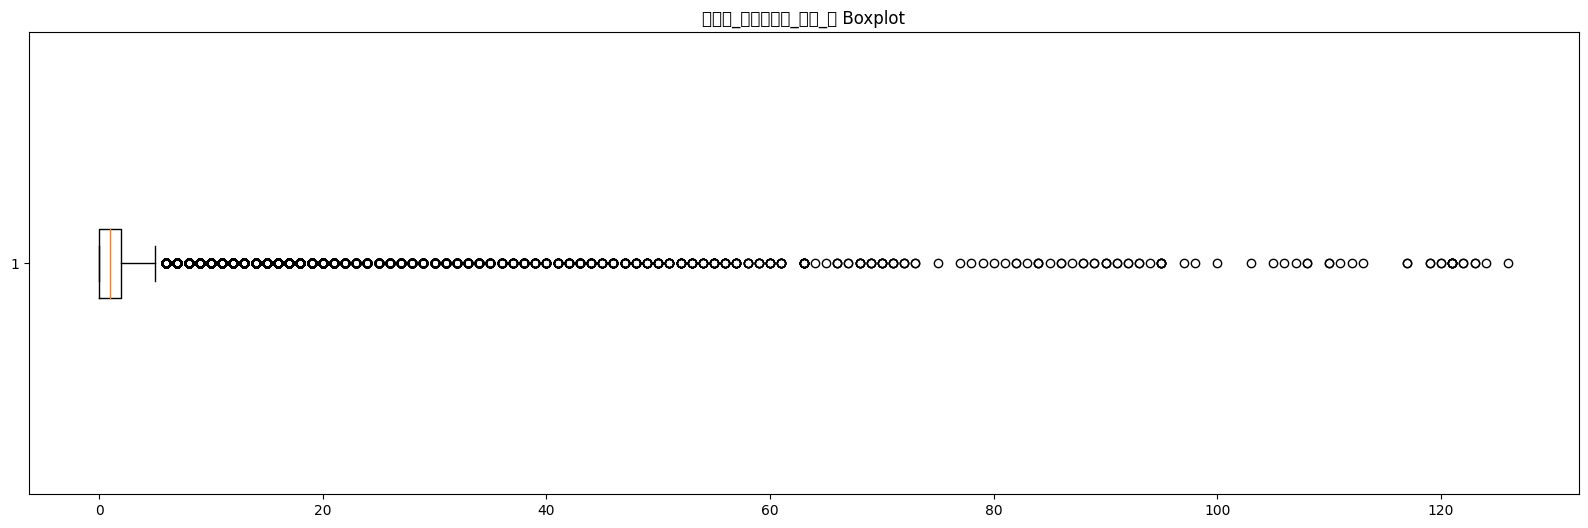

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

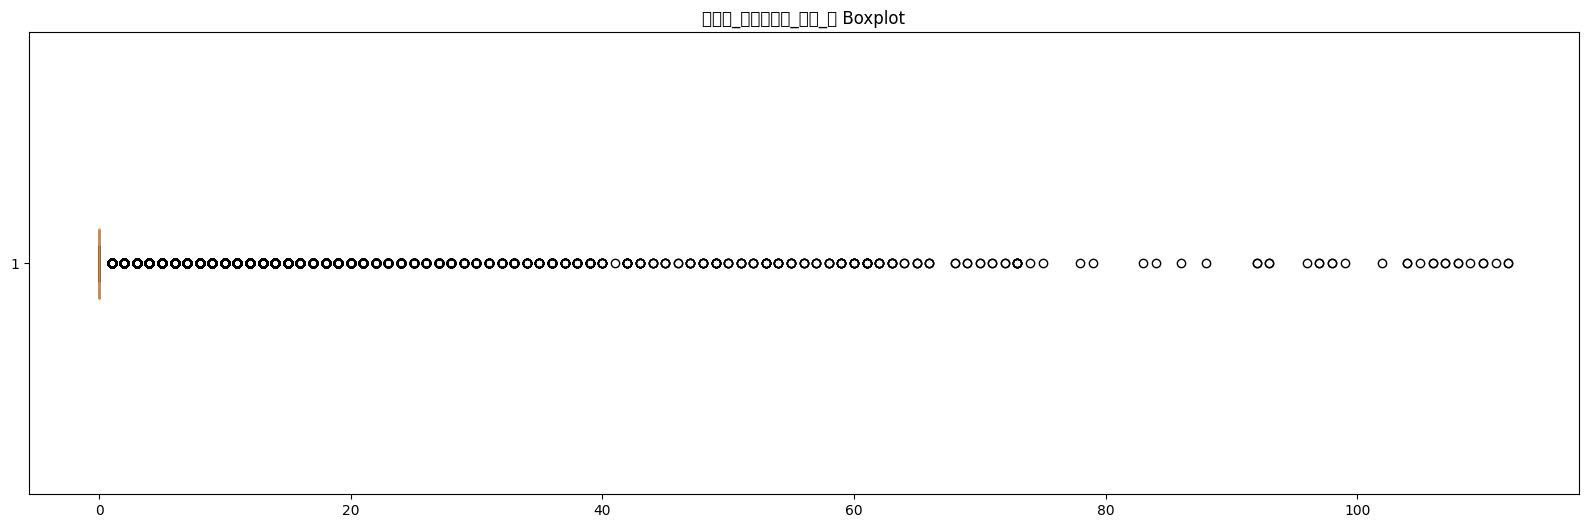

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

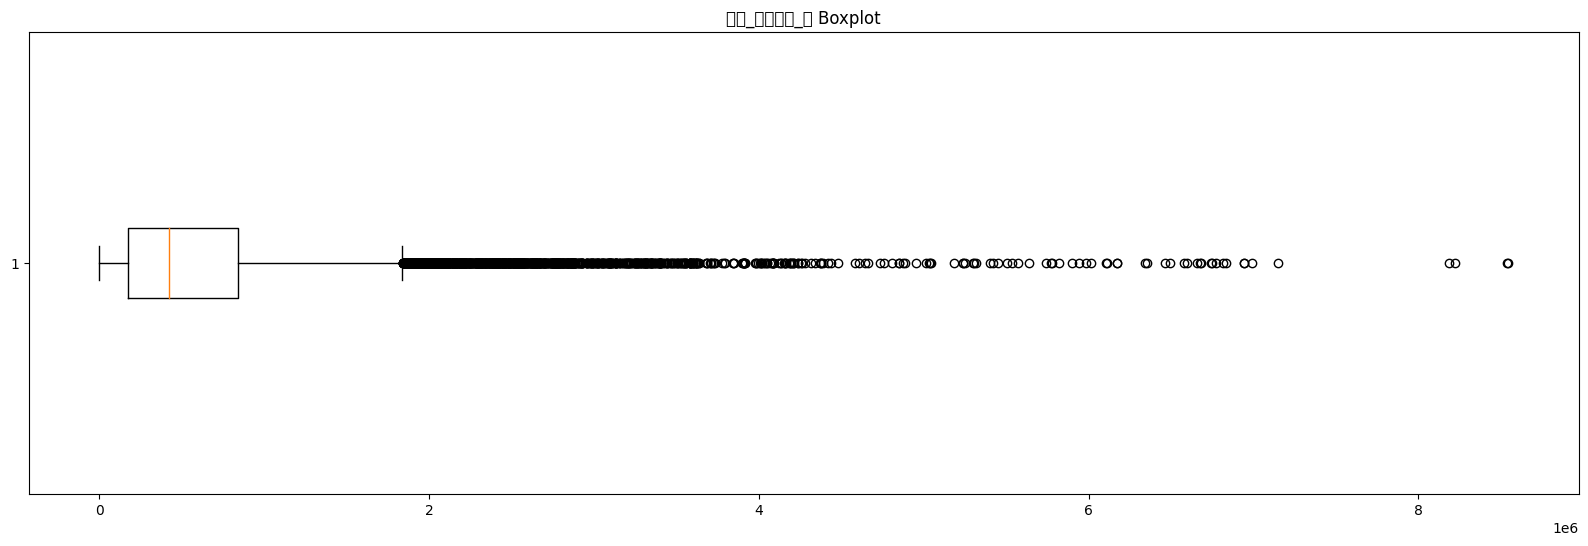

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

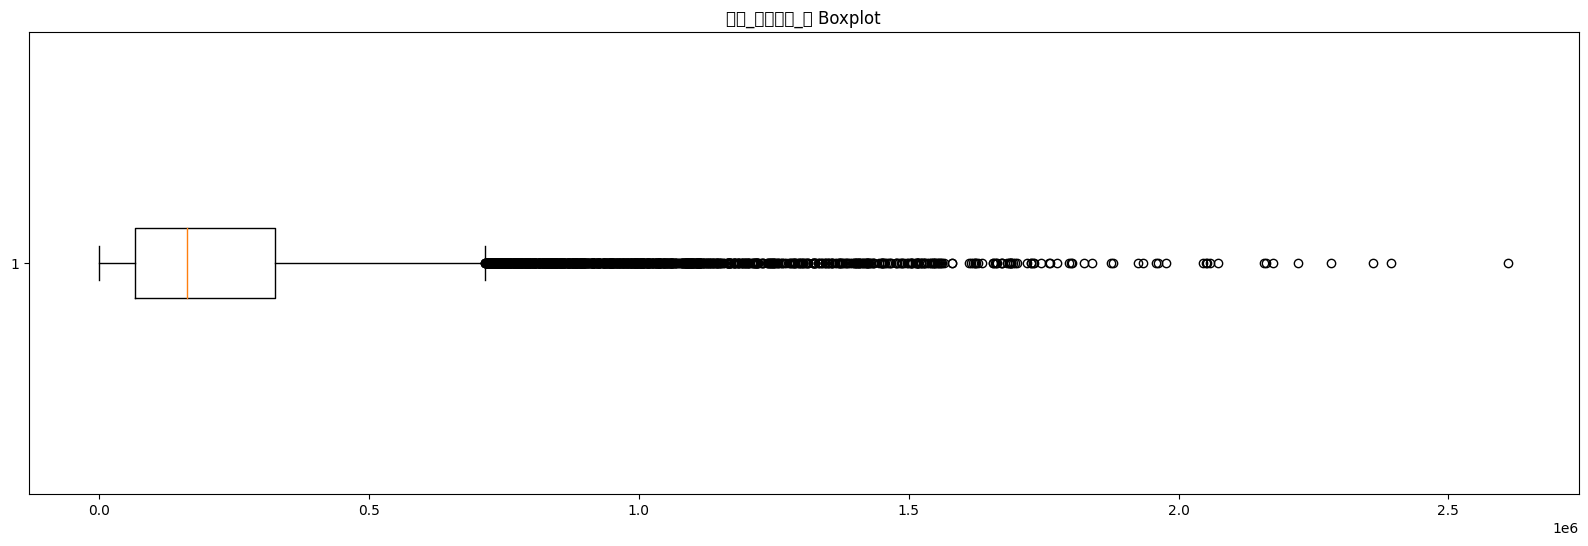

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

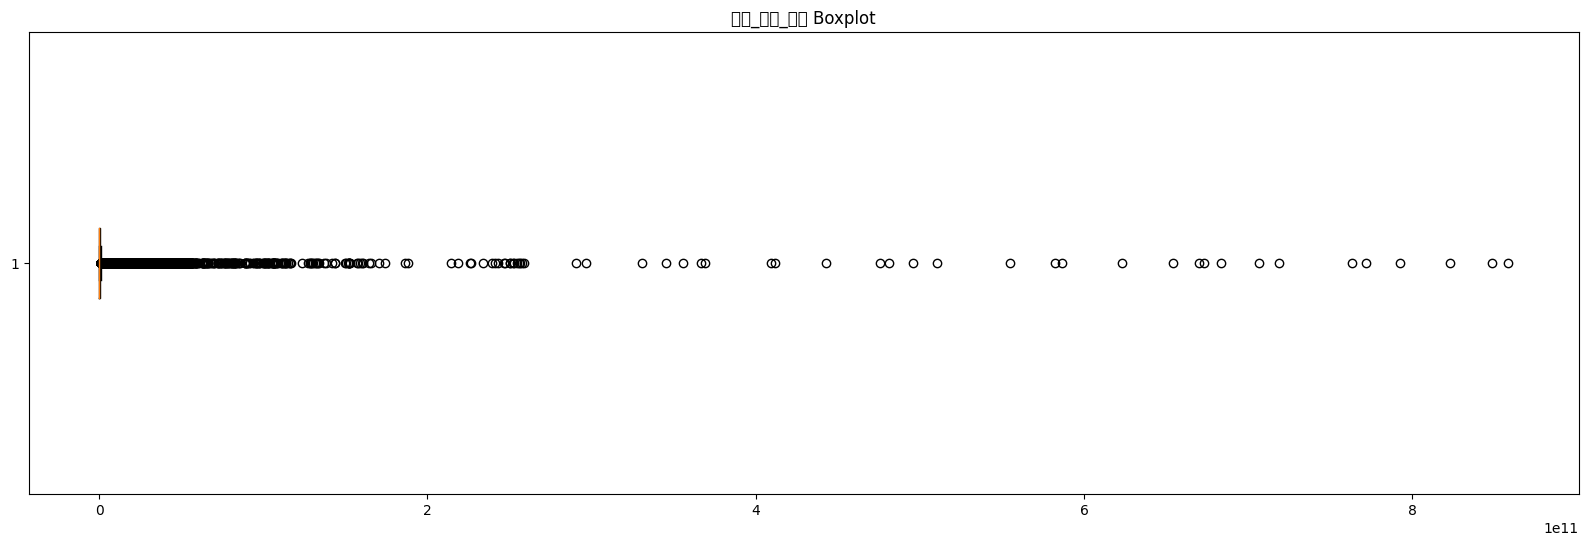

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

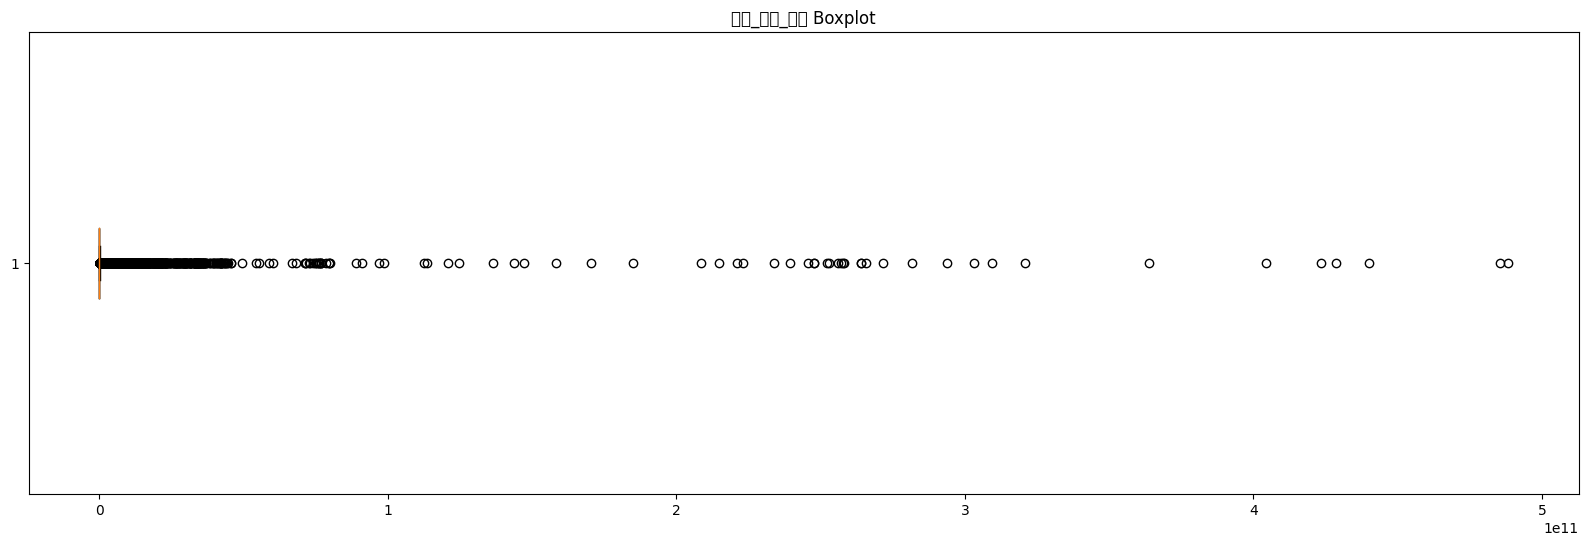

In [40]:
cleaned_data = column_a.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('음식점_프랜차이즈_점포_수 Boxplot')
plt.show()

cleaned_data = column_b.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('소매업_프랜차이즈_점포_수 Boxplot')
plt.show()

cleaned_data = column_c.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('평일_유동인구_수 Boxplot')
plt.show()

cleaned_data = column_d.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주말_유동인구_수 Boxplot')
plt.show()

cleaned_data = column_e.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주중_매출_금액 Boxplot')
plt.show()

cleaned_data = column_f.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주말_매출_금액 Boxplot')
plt.show()

In [41]:
money.transpose()

0                       1         2         3      \
기준_년분기_코드             20191                   20191     20191     20191   
상권_구분_코드                  D                       U         A         A   
상권_구분_코드_명             발달상권                    관광특구      골목상권      골목상권   
상권_코드               3120037                 3001492   3110085   3110166   
상권_코드_명          동대문역사문화공원역  명동 남대문 북창동 다동 무교동 관광특구    경리단길남측  구의1동주민센터   
서비스_업종_코드          CS200029                CS200029  CS200029  CS200029   
서비스_업종_코드_명             네일숍                     네일숍       네일숍       네일숍   
당월_매출_금액           20393290                73147711   3000000   8443798   
당월_매출_건수                208                    2136        40       153   
주중_매출_금액           17051978                57025458   2337081   4984275   
주말_매출_금액            3341312                16122253    662919   3459523   
월요일_매출_금액          10079574                11704014         0         0   
화요일_매출_금액                 0                 9926780    604671         0   
수요일_매출_금액           3251302                13925573    294118   1306931   
목요일_매출_금액           1736638                11094589    705882   2370413   
금요일_매출_금액           1984464                10374502    732410   1306931   
토요일_매출_금액            596831                12816251    477734   2754805   
일요일_매출_금액           2744481                 3306002    185185    704718   
시간대_00~06_매출_금액           0                       0         0         0   
시간대_06~11_매출_금액           0                   71676    555556         0   
시간대_11~14_매출_금액     2806361                13593203    185185   1153174   
시간대_14~17_매출_금액     1883718                18551907    826252   1588818   
시간대_17~21_매출_금액    14209451                39329730   1026528   4420501   
시간대_21~24_매출_금액     1493760                 1601195    406479   1281305   
남성_매출_금액                  0                 3011932         0    128130   
여성_매출_금액           20393290                70135779   3000000   8315668   
연령대_10_매출_금액              0                       0         0         0   
연령대_20_매출_금액        3494505                20258941    479303   1716948   
연령대_30_매출_금액        2724832                34029326   1604958   5445545   
연령대_40_매출_금액              0                 8219377    915739   1281305   
연령대_50_매출_금액       13673767                 7853565         0         0   
연령대_60_이상_매출_금액      500186                 2786502         0         0   
주중_매출_건수                176                    1757        32        89   
주말_매출_건수                 32                     379         8        64   
월요일_매출_건수                73                     286         0         0   
화요일_매출_건수                 0                     364         5         0   
수요일_매출_건수                49                     457         6        25   
목요일_매출_건수                36                     391        12        38   
금요일_매출_건수                18                     259         9        26   
토요일_매출_건수                14                     284         6        38   
일요일_매출_건수                18                      95         2        26   
시간대_건수~06_매출_건수           0                       0         0         0   
시간대_건수~11_매출_건수           0                       5         1         0   
시간대_건수~14_매출_건수          56                     264         2        26   
시간대_건수~17_매출_건수          39                     562        14        50   
시간대_건수~21_매출_건수          86                    1270        14        64   
시간대_건수~24_매출_건수          27                      35         9        13   
남성_매출_건수                  0                      59         0        13   
여성_매출_건수                208                    2077        40       140   
연령대_10_매출_건수              0                       0         0         0   
연령대_20_매출_건수             56                     715         8        52   
연령대_30_매출_건수             21                     995        28        88   
연령대_40_매출_건수              0                    

In [42]:
food_isang = food[food['상권_코드'] == 3001492]
food_isang
food_isang.to_csv('food_isang.csv')

In [43]:
# # 음식점 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
# food_fran['음식점_프랜차이즈_점포_수'] = food_fran['음식점_프랜차이즈_점포_수'].astype('Int64')
# food_fran.info()

In [44]:
# columns_to_plot = ['음식점_프랜차이즈_점포_수','소매업_프랜차이즈_점포_수']

# # plt.figure(figsize=(10, 8))
# sns.boxplot(data=food_fran_somae[columns_to_plot])
# plt.xticks(rotation=90)

# plt.title('이상치 확인 boxplot')

# plt.show()

In [45]:
# columns_to_plot = ['청년층_유동인구_수','중년층_유동인구_수','음식점_프랜차이즈_점포_수','소매업_프랜차이즈_점포_수','개업_점포_수','폐업_점포_수','주중_매출_건수','주말_매출_건수']

# # plt.figure(figsize=(10, 8))
# sns.boxplot(data=df[columns_to_plot])
# plt.xticks(rotation=90)

# plt.title('이상치 확인 boxplot')

# plt.show()

In [46]:
import pandas as pd

In [47]:
cd_sorted = commer_district_sigakhwa.sort_values(by='자치구_코드_명',ascending=True)
cd_sorted

상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명  엑스좌표_값  와이좌표_값  자치구_코드  \
1649        U       관광특구  3001496        강남 마이스 관광특구  205282  445736   11680   
880         A       골목상권  3110986           삼성중앙역 7번  204629  445676   11680   
881         A       골목상권  3110987             영동대교남단  204745  447403   11680   
889         A       골목상권  3111002  한국교통안전공단 강남자동차검사소  210568  441126   11680   
893         A       골목상권  3110988             청담역 3번  204796  446536   11680   
...       ...        ...      ...                ...     ...     ...     ...   
265         A       골목상권  3110262             상봉역 3번  207850  454983   11260   
264         A       골목상권  3110261            사가정역 4번  207796  453176   11260   
263         A       골목상권  3110260             면목역 3번  207615  454450   11260   
275         A       골목상권  3110274              서일대학교  208722  454449   11260   
1576        R       전통시장  3130115             우림골목시장  208640  455380   11260   

     자치구_코드_명    행정동_코드 행정동_코드_명   영역_면적  
1649      강남구  11680580     삼성1동  237892  
880       강남구  11680590     삼성2동   15944  
881       강남구  11680565      청담동   31393  
889       강남구  11680700      세곡동   59241  
893       강남구  11680580     삼성1동   79185  
...       ...       ...      ...     ...  
265       중랑구  11260590     상봉2동  121975  
264       중랑구  11260570     면목7동  109503  
263       중랑구  11260565     면목본동   65941  
275       중랑구  11260575   면목3?8동  164098  
1576      중랑구  11260655     망우본동   78310  

[1650 rows x 11 columns]

In [48]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [49]:
import matplotlib.font_manager as fm

# 설치 되어 있는 폰트 확인
fm._get_fontconfig_fonts()

plt.rc('font', family='NanumBarunGothic')

# 시각화할 때 음수 표시 설정
plt.rcParams['axes.unicode_minus'] =False

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

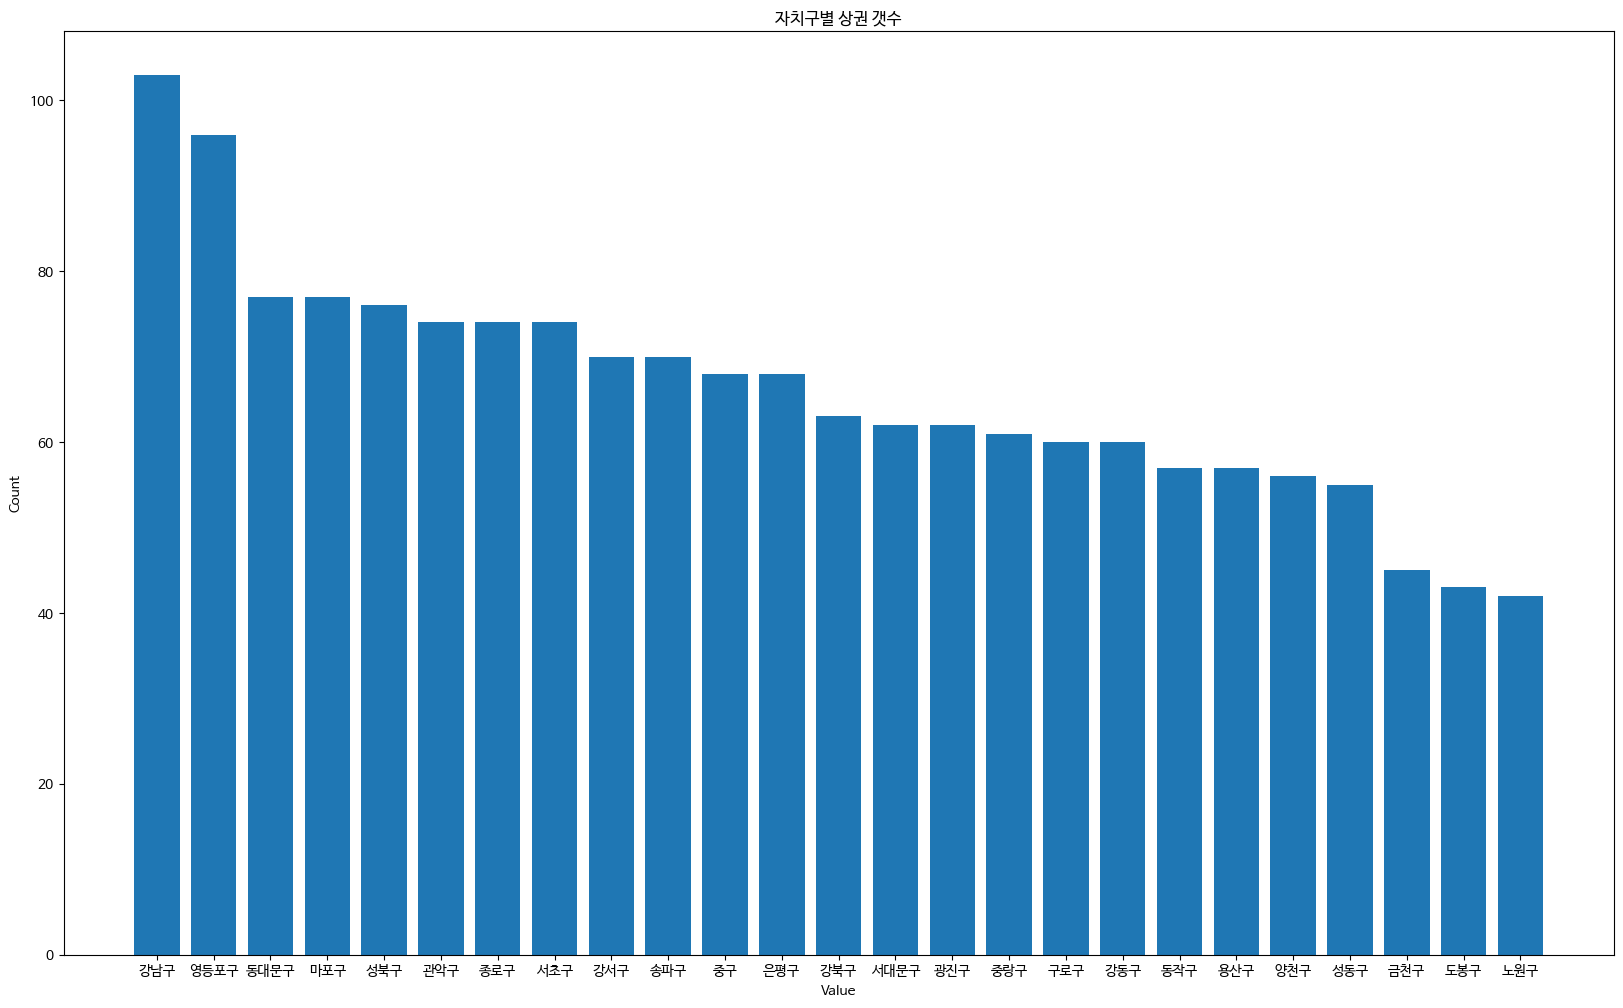

In [50]:
value_counts = cd_sorted['자치구_코드_명'].value_counts()
plt.figure(figsize=(20, 12))
# 히스토그램 그리기
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('자치구별 상권 갯수')
plt.show()
# 각 자치구별 상권 갯수

In [50]:
# 내림차순 정렬을 통해 강남구에 상권이 가장 많다는 것을 알 수 있었다. 

In [51]:
grouped1 = cd_sorted.groupby(['자치구_코드_명', '상권_구분_코드_명']).size().reset_index(name='count')

print(grouped1)

   자치구_코드_명 상권_구분_코드_명  count
0       강남구       골목상권     54
1       강남구       관광특구      1
2       강남구       발달상권     39
3       강남구       전통시장      9
4       강동구       골목상권     43
..      ...        ...    ...
75       중구       발달상권     23
76       중구       전통시장     22
77      중랑구       골목상권     47
78      중랑구       발달상권      2
79      중랑구       전통시장     12

[80 rows x 3 columns]


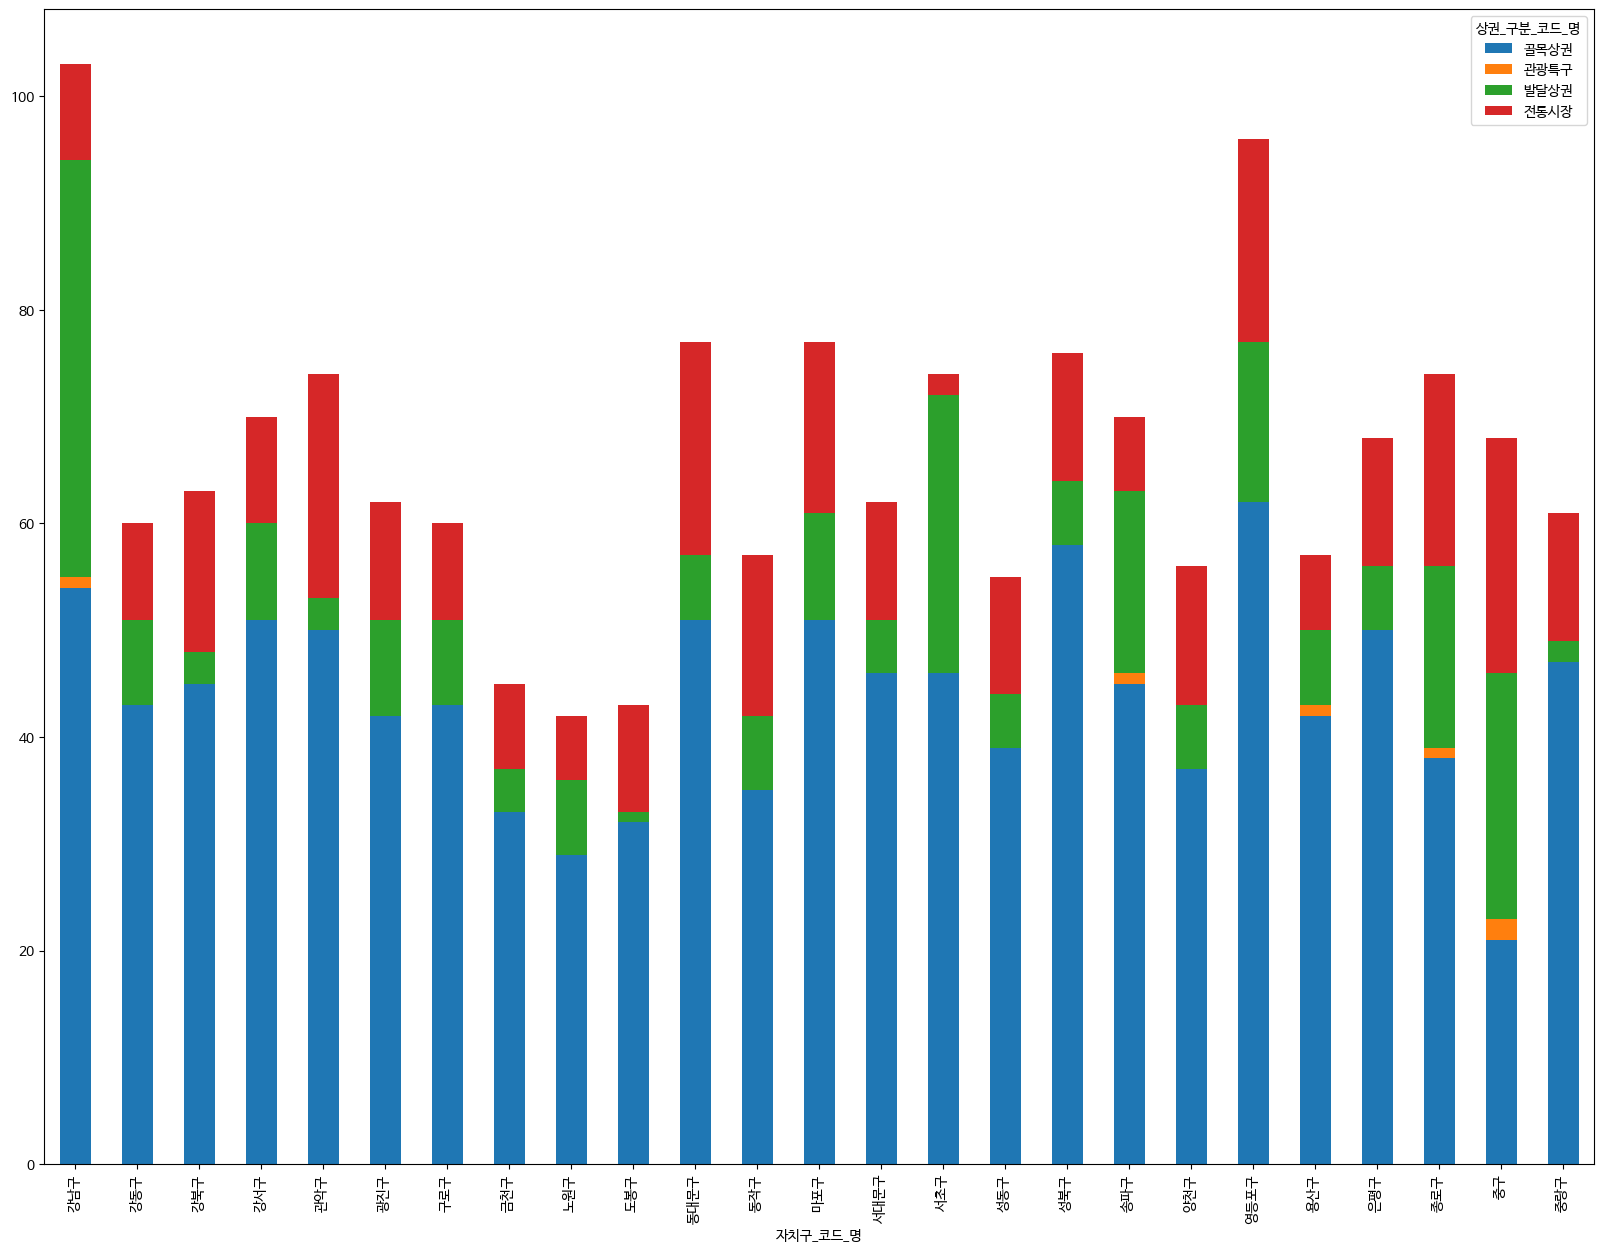

In [52]:
pivot_df = grouped1.pivot(index='자치구_코드_명', columns='상권_구분_코드_명', values='count')
pivot_df.plot(kind='bar', stacked=True,figsize=(20, 15) )
plt.show()
# 각 자치구별 상권구분을 알아보며, 전반적인 상권의 갯수, 어떤 상권이 어떤 자치구에 많이 분포하는지를 알 수 있음.

In [ ]:
# 하나의 자치구에서 어떤 상권이 차지하는 비율이 어느 정도 되는지 알 수 있다.
# 그래프 해석은??

In [53]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [54]:
import matplotlib.font_manager as fm

# 설치 되어 있는 폰트 확인
fm._get_fontconfig_fonts()

plt.rc('font', family='NanumBarunGothic')

# 시각화할 때 음수 표시 설정
plt.rcParams['axes.unicode_minus'] =False

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 사용하고자 하는 한글 폰트명을 지정해주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [55]:
# CSV 파일 로드
data = pd.read_csv('fran_openclose.csv')

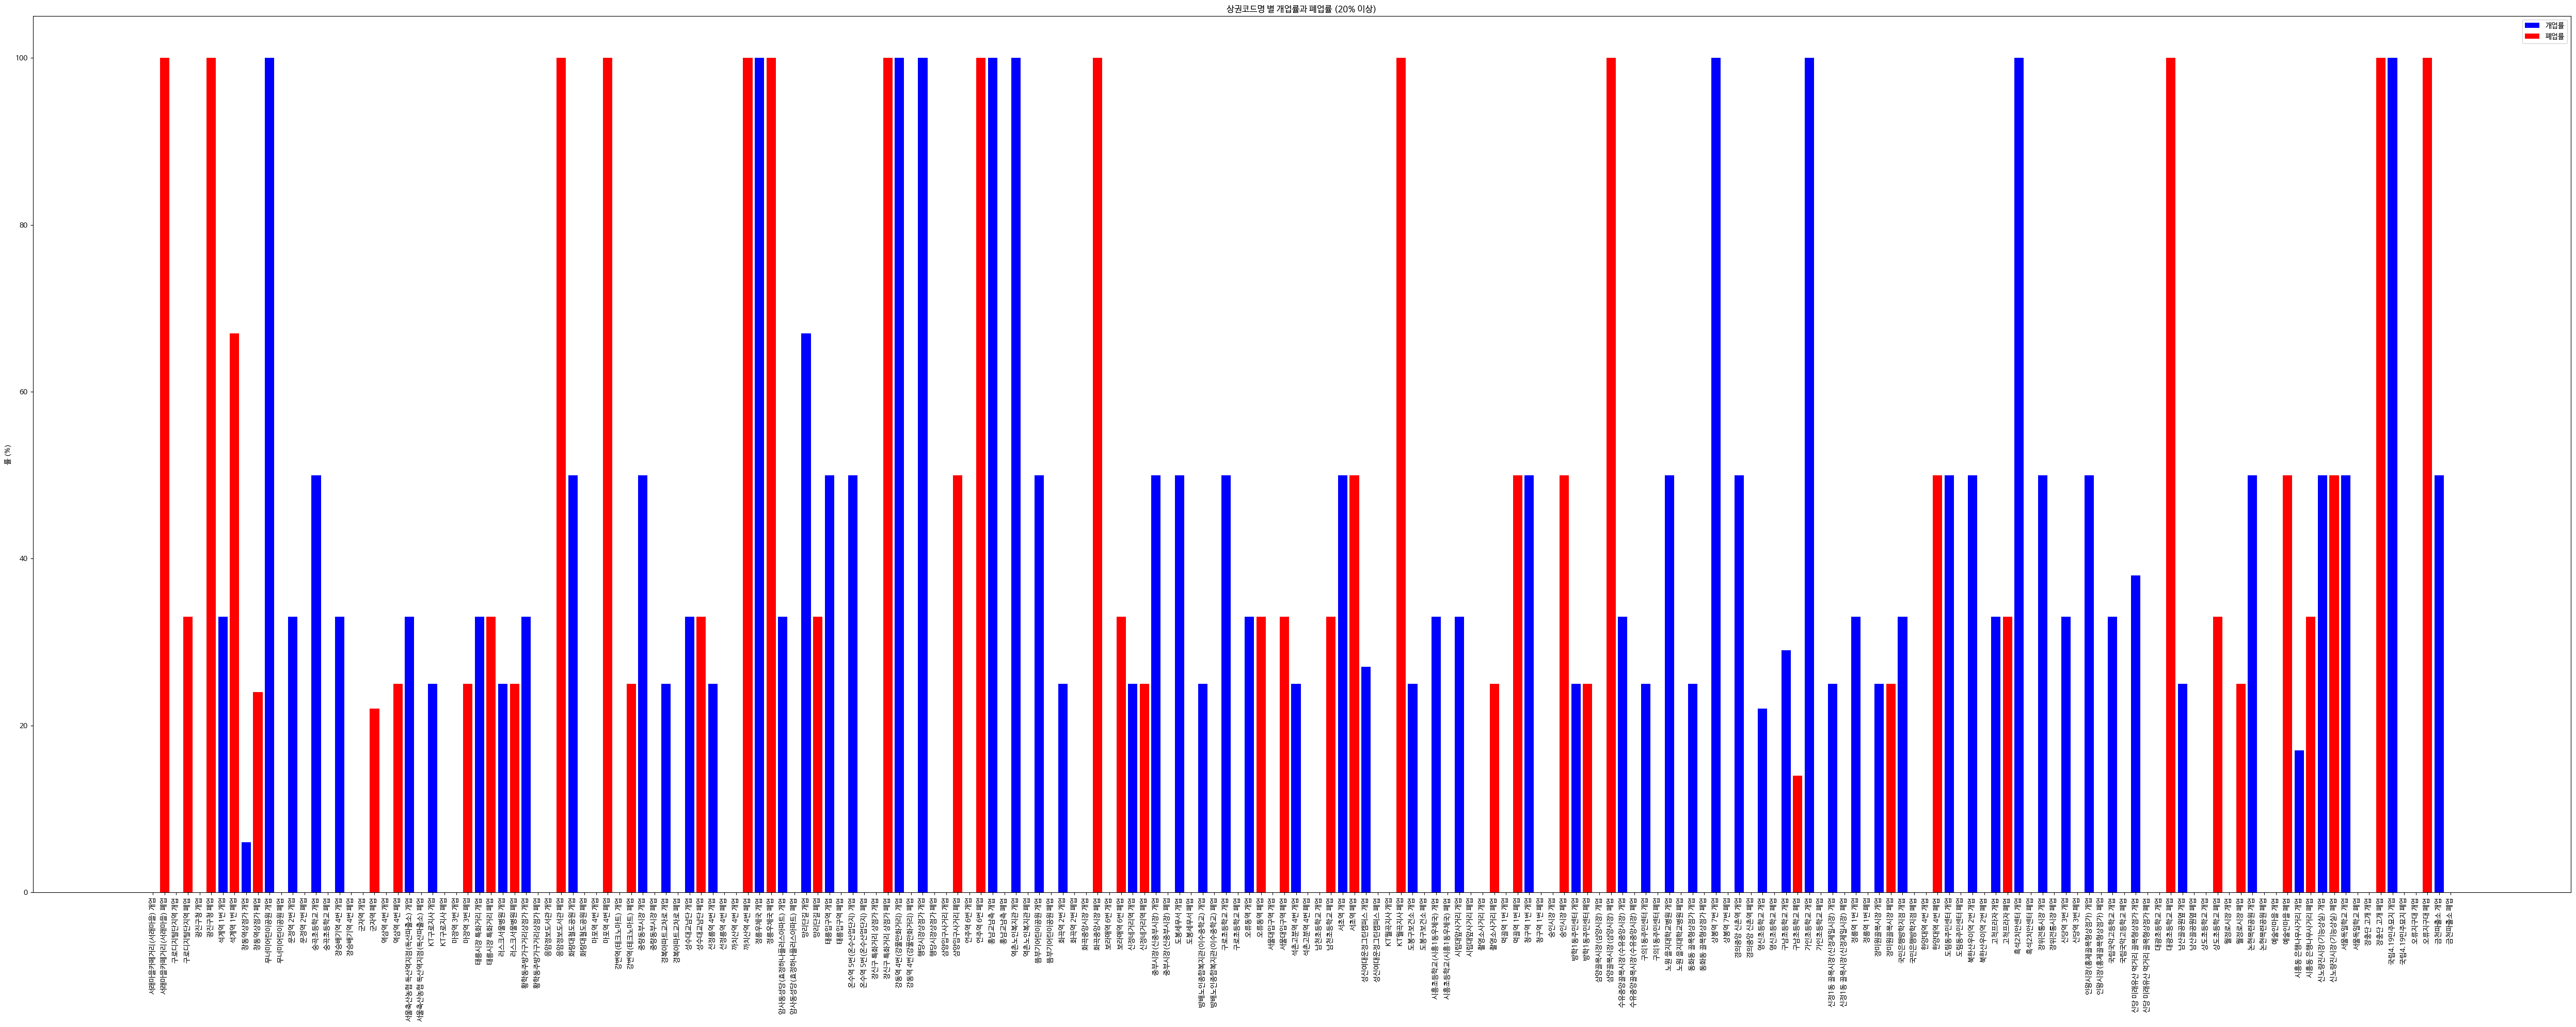

In [56]:
# 각 상권별로 어떤 상권이 개업률과 폐업률이 높은지 알수 있으며(상권의 폐업과 개업이 높으면 젠트리피케이션이 일어날 확률이 높다고 판단하여),
# 높은 상권만 찾고자 했기 때문에 20%이상인 경우만 그래프 표시.(보통 11, 15(개업))
plt.figure(figsize=(50, 20))  # 그래프 크기 설정
for code_name in data['상권_코드_명'].unique():
    subset = data[data['상권_코드_명'] == code_name]
    개업률 = subset['개업_율'].values[0]
    폐업률 = subset['폐업_률'].values[0]
    if 개업률 > 20 or 폐업률 > 20:  # 개업률이나 폐업률이 20이상인 경우에만 막대 그래프 생성
        plt.bar(code_name + ' 개업', 개업률, color='blue')  # 개업률 막대
        plt.bar(code_name + ' 폐업', 폐업률, color='red')  # 폐업률 막대

plt.ylabel('률 (%)')  # y축 라벨
plt.title('상권코드명 별 개업률과 폐업률 (20% 이상)')  # 그래프 제목
plt.xticks(rotation=90)  # x축 라벨 회전
plt.legend(['개업률', '폐업률'])  # 범례 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [57]:
# 2. 유동인구 나이별 시각화(청년층(20, 30), 중년층(40, 50), 60)

In [58]:
# 파일을 읽어들여서 데이터프레임 생성
dataset = pd.read_csv('dataset.csv')

# 데이터프레임의 처음 몇 줄을 출력
print(dataset.head().T)

                    0          1          2          3          4
Unnamed: 0          0          1          2          3          4
기준_년분기_코드       20191      20191      20191      20191      20191
상권_구분_코드            D          D          D          D          D
상권_구분_코드_명       발달상권       발달상권       발달상권       발달상권       발달상권
상권_코드         3120037    3120037    3120037    3120037    3120037
...               ...        ...        ...        ...        ...
일요일_유동인구_수   427082.0   427082.0   427082.0   427082.0   427082.0
청년층_유동인구_수  1580831.0  1580831.0  1580831.0  1580831.0  1580831.0
중년층_유동인구_수  1284764.0  1284764.0  1284764.0  1284764.0  1284764.0
평일_유동인구_수   2912071.0  2912071.0  2912071.0  2912071.0  2912071.0
주말_유동인구_수    939089.0   939089.0   939089.0   939089.0   939089.0

[91 rows x 5 columns]


In [59]:
dataset.head().T

0          1          2          3          4
Unnamed: 0          0          1          2          3          4
기준_년분기_코드       20191      20191      20191      20191      20191
상권_구분_코드            D          D          D          D          D
상권_구분_코드_명       발달상권       발달상권       발달상권       발달상권       발달상권
상권_코드         3120037    3120037    3120037    3120037    3120037
...               ...        ...        ...        ...        ...
일요일_유동인구_수   427082.0   427082.0   427082.0   427082.0   427082.0
청년층_유동인구_수  1580831.0  1580831.0  1580831.0  1580831.0  1580831.0
중년층_유동인구_수  1284764.0  1284764.0  1284764.0  1284764.0  1284764.0
평일_유동인구_수   2912071.0  2912071.0  2912071.0  2912071.0  2912071.0
주말_유동인구_수    939089.0   939089.0   939089.0   939089.0   939089.0

[91 rows x 5 columns]

In [60]:
# # 필요한 열만 추출
# subset = dataset[['상권_구분_코드_명', '상권_코드_명', '청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']]

# # 상권 구분 코드명과 상권 코드명을 기준으로 그룹화하여 유동 인구 수의 합을 계산
# grouped = subset.groupby(['상권_구분_코드_명', '상권_코드_명']).sum()

# # 그래프 그리기
# grouped.plot(kind='bar', figsize=(10, 6))
# plt.title('유동 인구 수 비교')
# plt.xlabel('(상권_구분_코드_명, 상권_코드_명)')
# plt.ylabel('유동 인구 수')
# plt.legend(['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수'])
# plt.show()


In [61]:

# # 필요한 열만 추출
# subset = dataset[['상권_구분_코드_명', '상권_코드_명', '청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']]

# # 상권 구분 코드명과 상권 코드명을 기준으로 그룹화하여 유동 인구 수의 합을 계산
# grouped = subset.groupby(['상권_구분_코드_명', '상권_코드_명']).sum()

# # 각 유동인구별로 그래프 그리기
# for column in ['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']:
#     plt.figure(figsize=(10, 6))
#     grouped[column].plot(kind='bar')
#     plt.title(f'{column} 비교')
#     plt.xlabel('(상권_구분_코드_명, 상권_코드_명)')
#     plt.ylabel(column)
#     plt.show()


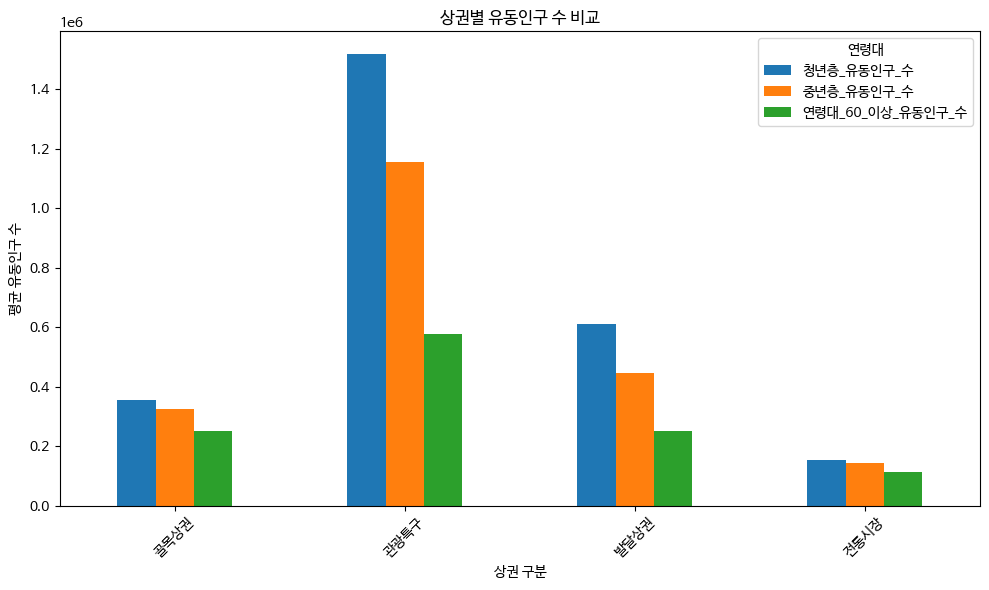

In [62]:
# '상권_구분_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산 (각 상권별로 어떤 상권에서 어떤한 계층의 유동인구수 , 즉 그 상권을 많이 이용하는지 알아보고자 그래프를 그)
grouped_data = dataset.groupby('상권_구분_코드_명')[['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# 그래프 그리기
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('상권별 유동인구 수 비교')
plt.xlabel('상권 구분')
plt.ylabel('평균 유동인구 수')
plt.xticks(rotation=45)
plt.legend(title='연령대', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [63]:
# # '상권_구분_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산
# grouped_data = dataset.groupby('상권_코드_명')[['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# # 그래프 그리기
# grouped_data.plot(kind='bar', figsize=(50, 15))
# plt.title('상권코드별 유동인구 수 비교')
# plt.xlabel('상권 코드별')
# plt.ylabel('평균 유동인구 수')
# plt.xticks(rotation=90)
# plt.legend(title='연령대', bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

In [64]:
# # '상권_구분_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산
# grouped_data = dataset.groupby('상권_코드_명')[['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# # 수평 막대 그래프
# grouped_data.plot(kind='barh', figsize=(15, 20))
# plt.title('상권코드별 유동인구 수 비교')
# plt.xlabel('평균 유동인구 수')
# plt.ylabel('상권 코드명')
# plt.legend(title='연령대')
# plt.tight_layout()
# plt.show()

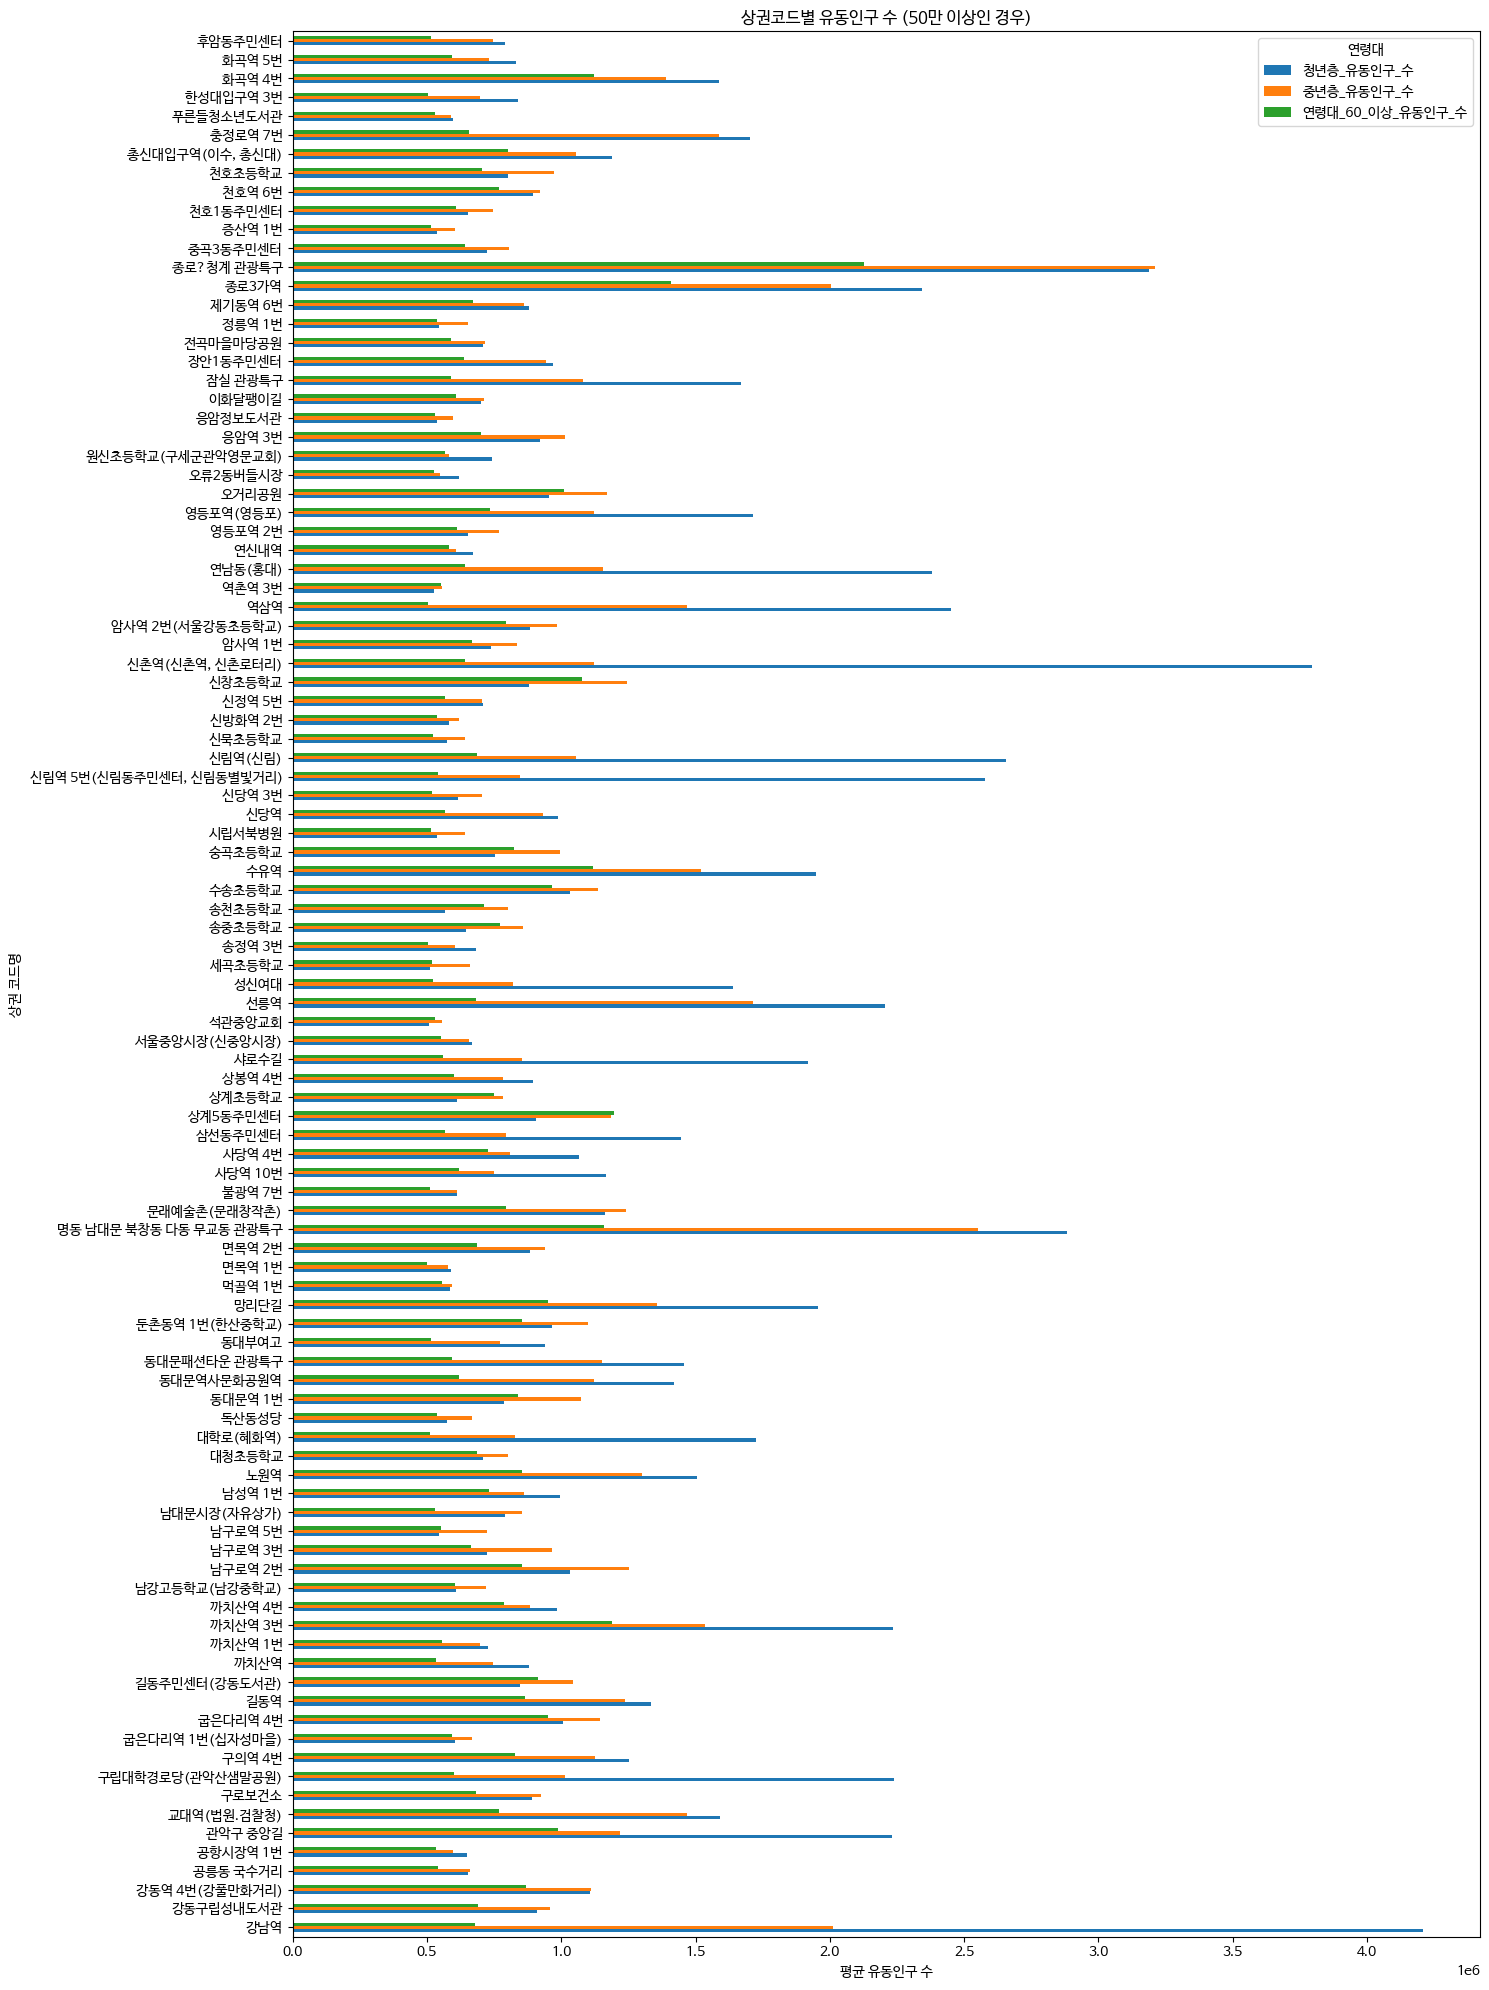

In [65]:


# '상권_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산
# (각 상권 별로 어떤 상권이 어떤 계층이 많이 이용하는지 알아보고자 그래프로 나타냄, 또한 많이 이용하는 것을 위주로 나타내고 싶었기에 50만 이상으로 분리)
grouped_data = dataset.groupby('상권_코드_명')[['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# 각 계층별 유동인구 수가 50만 이상인 데이터만 선택
grouped_data_filtered = grouped_data[(grouped_data['청년층_유동인구_수'] >= 500000) &
                                     (grouped_data['중년층_유동인구_수'] >= 500000) &
                                     (grouped_data['연령대_60_이상_유동인구_수'] >= 500000)]

# 수평 막대 그래프
grouped_data_filtered.plot(kind='barh', figsize=(15, 20))
plt.title('상권코드별 유동인구 수 (50만 이상인 경우)')
plt.xlabel('평균 유동인구 수')
plt.ylabel('상권 코드명')
plt.legend(title='연령대')
plt.tight_layout()
plt.show()


In [66]:
# # '상권_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산 (우선 50만 이하도 나타낸 것)
# grouped_data = dataset.groupby('상권_코드_명')[['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# # 각 계층별 유동인구 수가 50만 미만인 데이터만 선택
# grouped_data_filtered = grouped_data[(grouped_data['청년층_유동인구_수'] < 500000) &
#                                      (grouped_data['중년층_유동인구_수'] < 500000) &
#                                      (grouped_data['연령대_60_이상_유동인구_수'] < 500000)]

# # 수평 막대 그래프
# grouped_data_filtered.plot(kind='barh', figsize=(30, 40))
# plt.title('상권코드별 유동인구 수 (50만 미만인 경우)')
# plt.xlabel('평균 유동인구 수')
# plt.ylabel('상권 코드명')
# plt.legend(title='연령대')
# plt.tight_layout()
# plt.show()

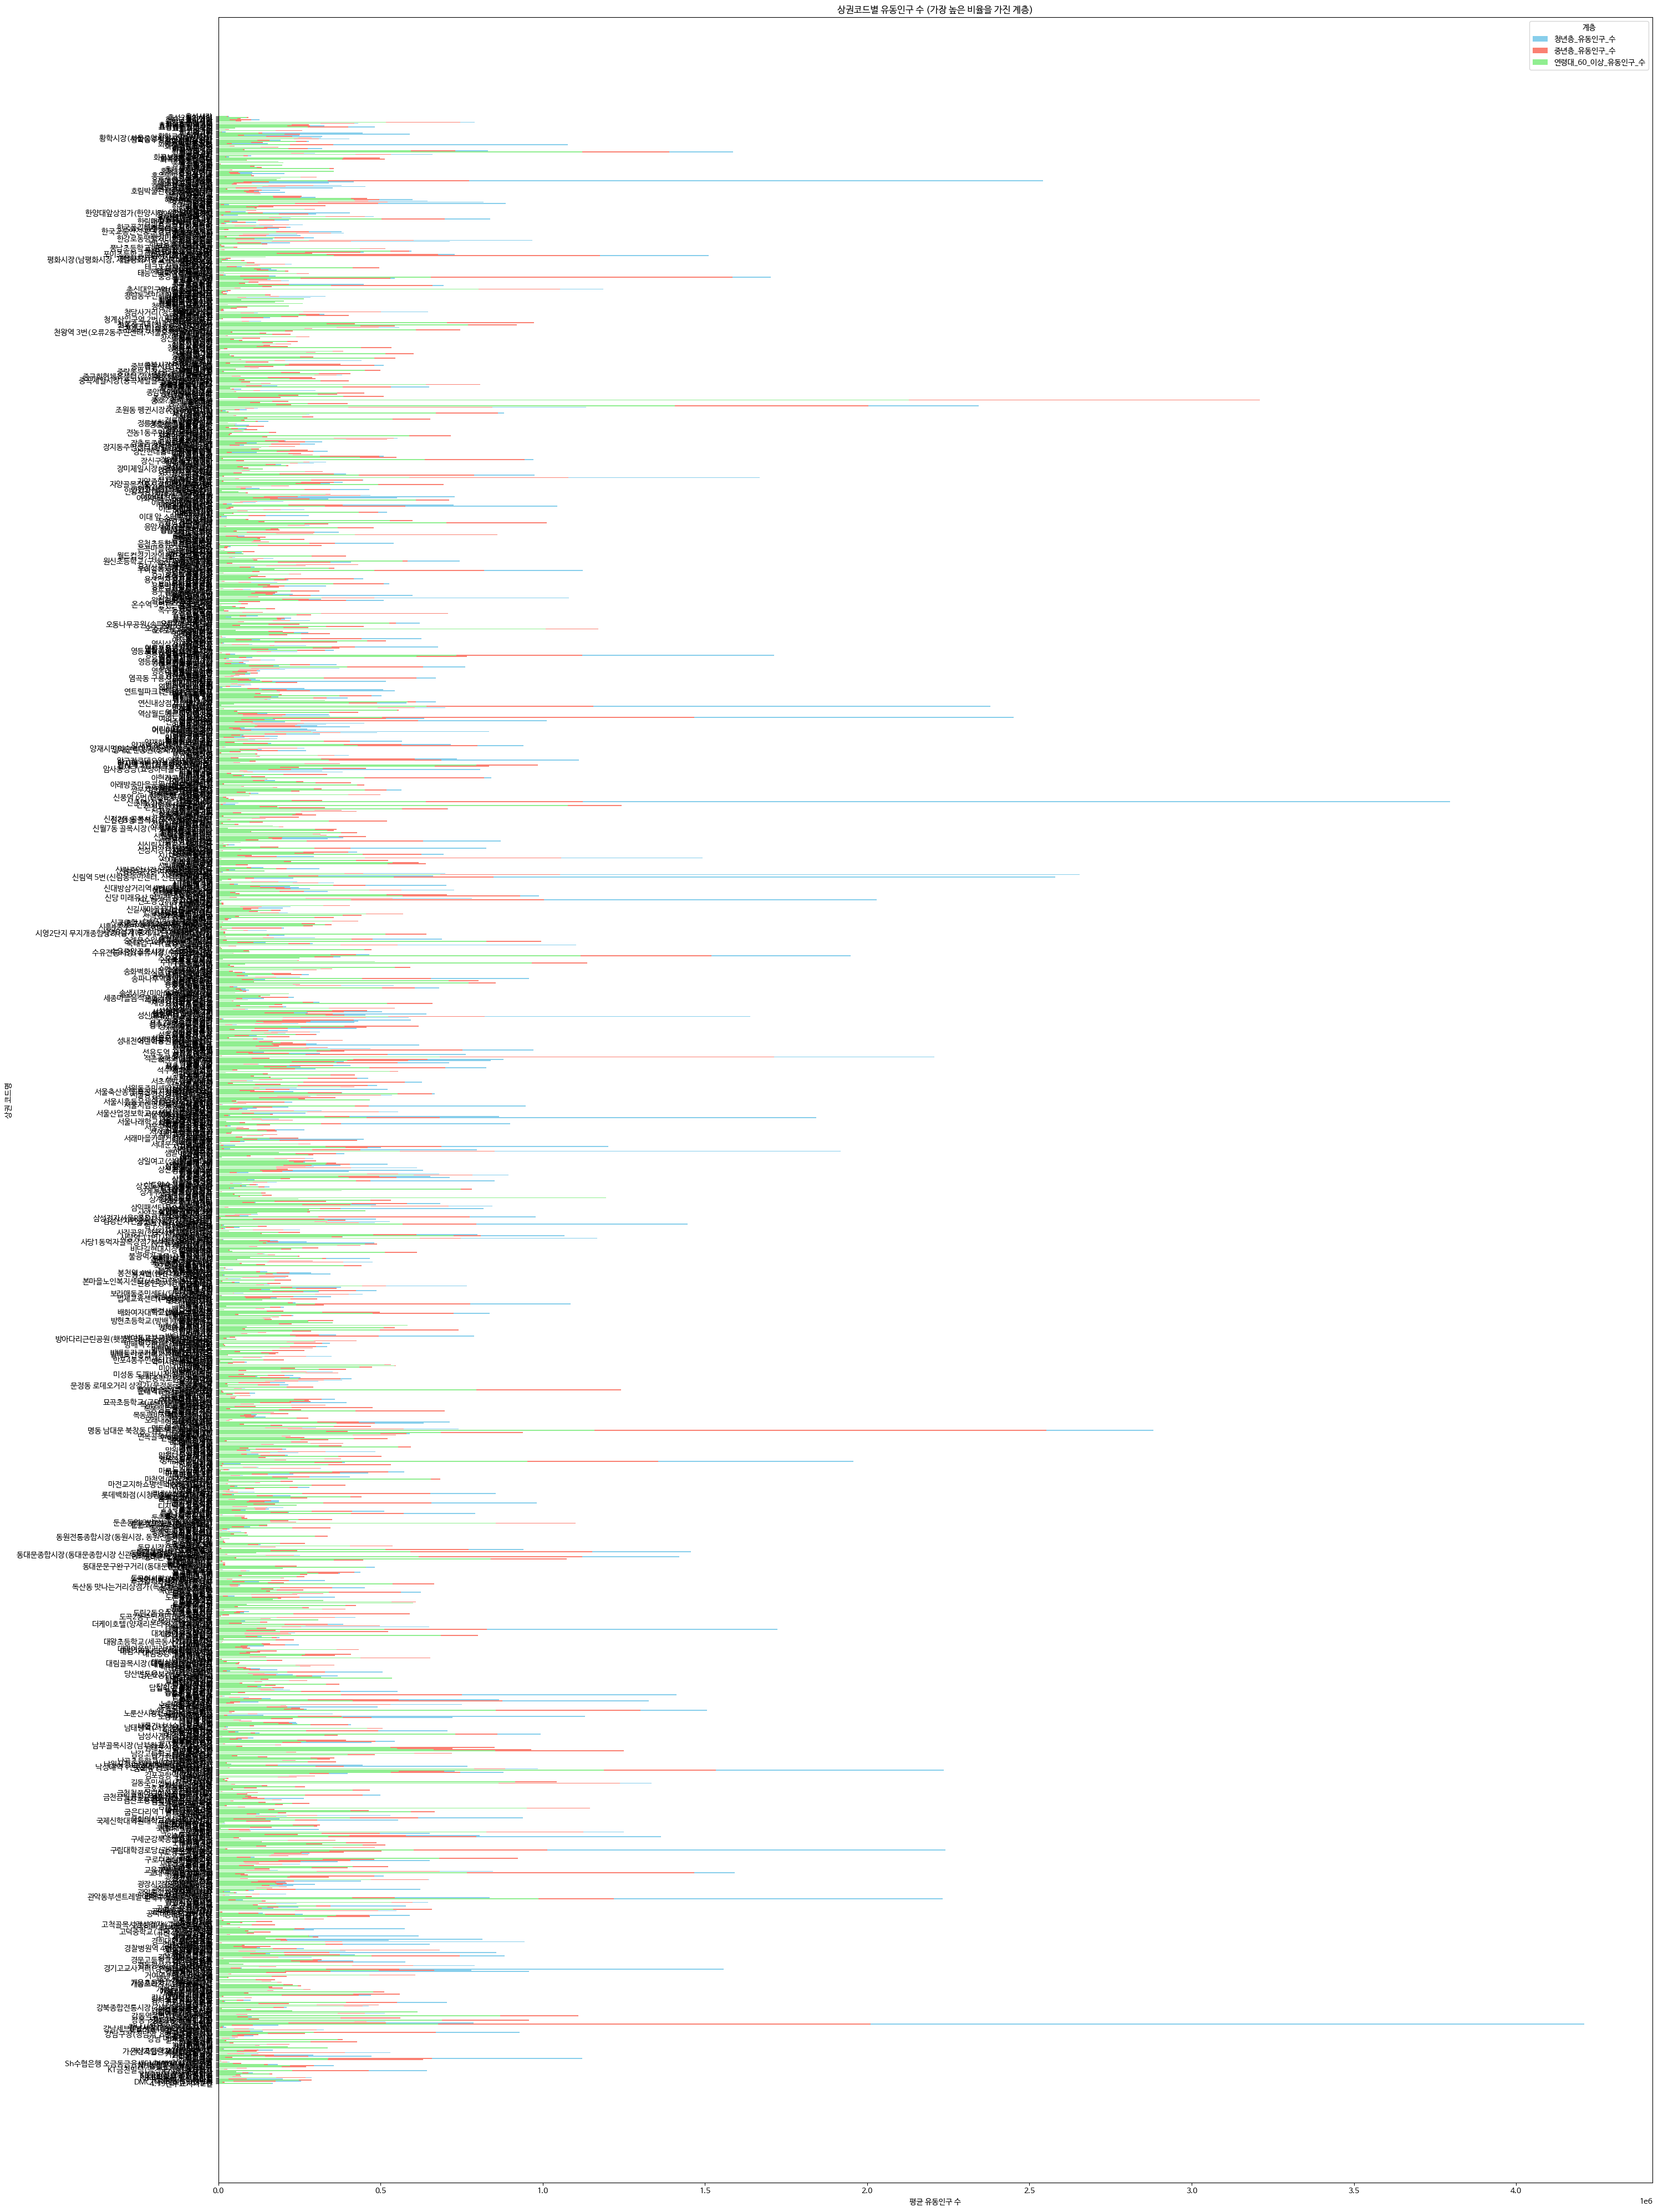

In [69]:
# '상권_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산
grouped_data = dataset.groupby('상권_코드_명')[['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# 각 상권 코드별로 가장 높은 비율을 가진 계층을 찾아서 해당 유동인구 수만 선택
max_ratio_population = grouped_data.idxmax(axis=1)  # 각 상권 코드별로 가장 높은 비율을 가진 계층을 찾음
max_ratio_population_values = grouped_data.max(axis=1)  # 해당 계층의 유동인구 수를 찾음

# 색상 팔레트 정의
colors = ['skyblue', 'salmon', 'lightgreen']

# 수평 막대 그래프
plt.figure(figsize=(30, 40))
for idx, col in enumerate(grouped_data.columns):
    plt.barh(grouped_data.index, grouped_data[col], color=colors[idx], label=col)

plt.title('상권코드별 유동인구 수 (가장 높은 비율을 가진 계층)')
plt.xlabel('평균 유동인구 수')
plt.ylabel('상권 코드명')
plt.legend(title='계층', loc='upper right')
plt.tight_layout()
plt.show()

In [70]:
# 각 계층별로 가장 큰 값을 가지는 상권 코드명 찾기 (각 연령별로 주축이 되는 상권의 갯수를 알아봄)
max_ratio_population_counts = max_ratio_population.value_counts()

# 결과값 출력
print("청년층 가장 많은 상권 코드명 개수:", max_ratio_population_counts['청년층_유동인구_수'])
print("중년층 가장 많은 상권 코드명 개수:", max_ratio_population_counts['중년층_유동인구_수'])
print("연령대 60 이상 가장 많은 상권 코드명 개수:", max_ratio_population_counts['연령대_60_이상_유동인구_수'])


청년층 가장 많은 상권 코드명 개수: 770
중년층 가장 많은 상권 코드명 개수: 800
연령대 60 이상 가장 많은 상권 코드명 개수: 80


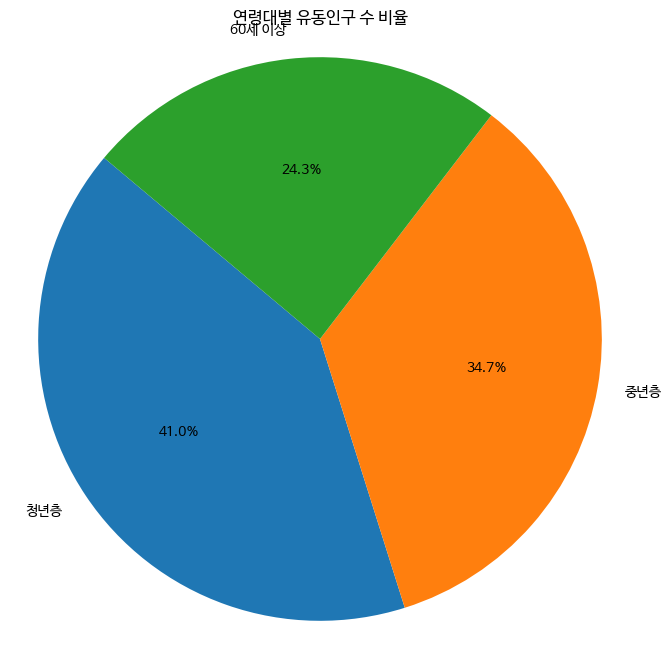

In [71]:
# 각 연령대별로 인구수가 다르기 떄문에 이를 원그래프로 나타내고 비율을 확인함.
# 각 연령대별 유동인구 수의 총합 계산
total_young_population = dataset['청년층_유동인구_수'].sum()
total_middle_aged_population = dataset['중년층_유동인구_수'].sum()
total_elderly_population = dataset['연령대_60_이상_유동인구_수'].sum()

# 원그래프를 그리기 위한 데이터 준비
labels = ['청년층', '중년층', '60세 이상']
sizes = [total_young_population, total_middle_aged_population, total_elderly_population]

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.title('연령대별 유동인구 수 비율')
plt.show()

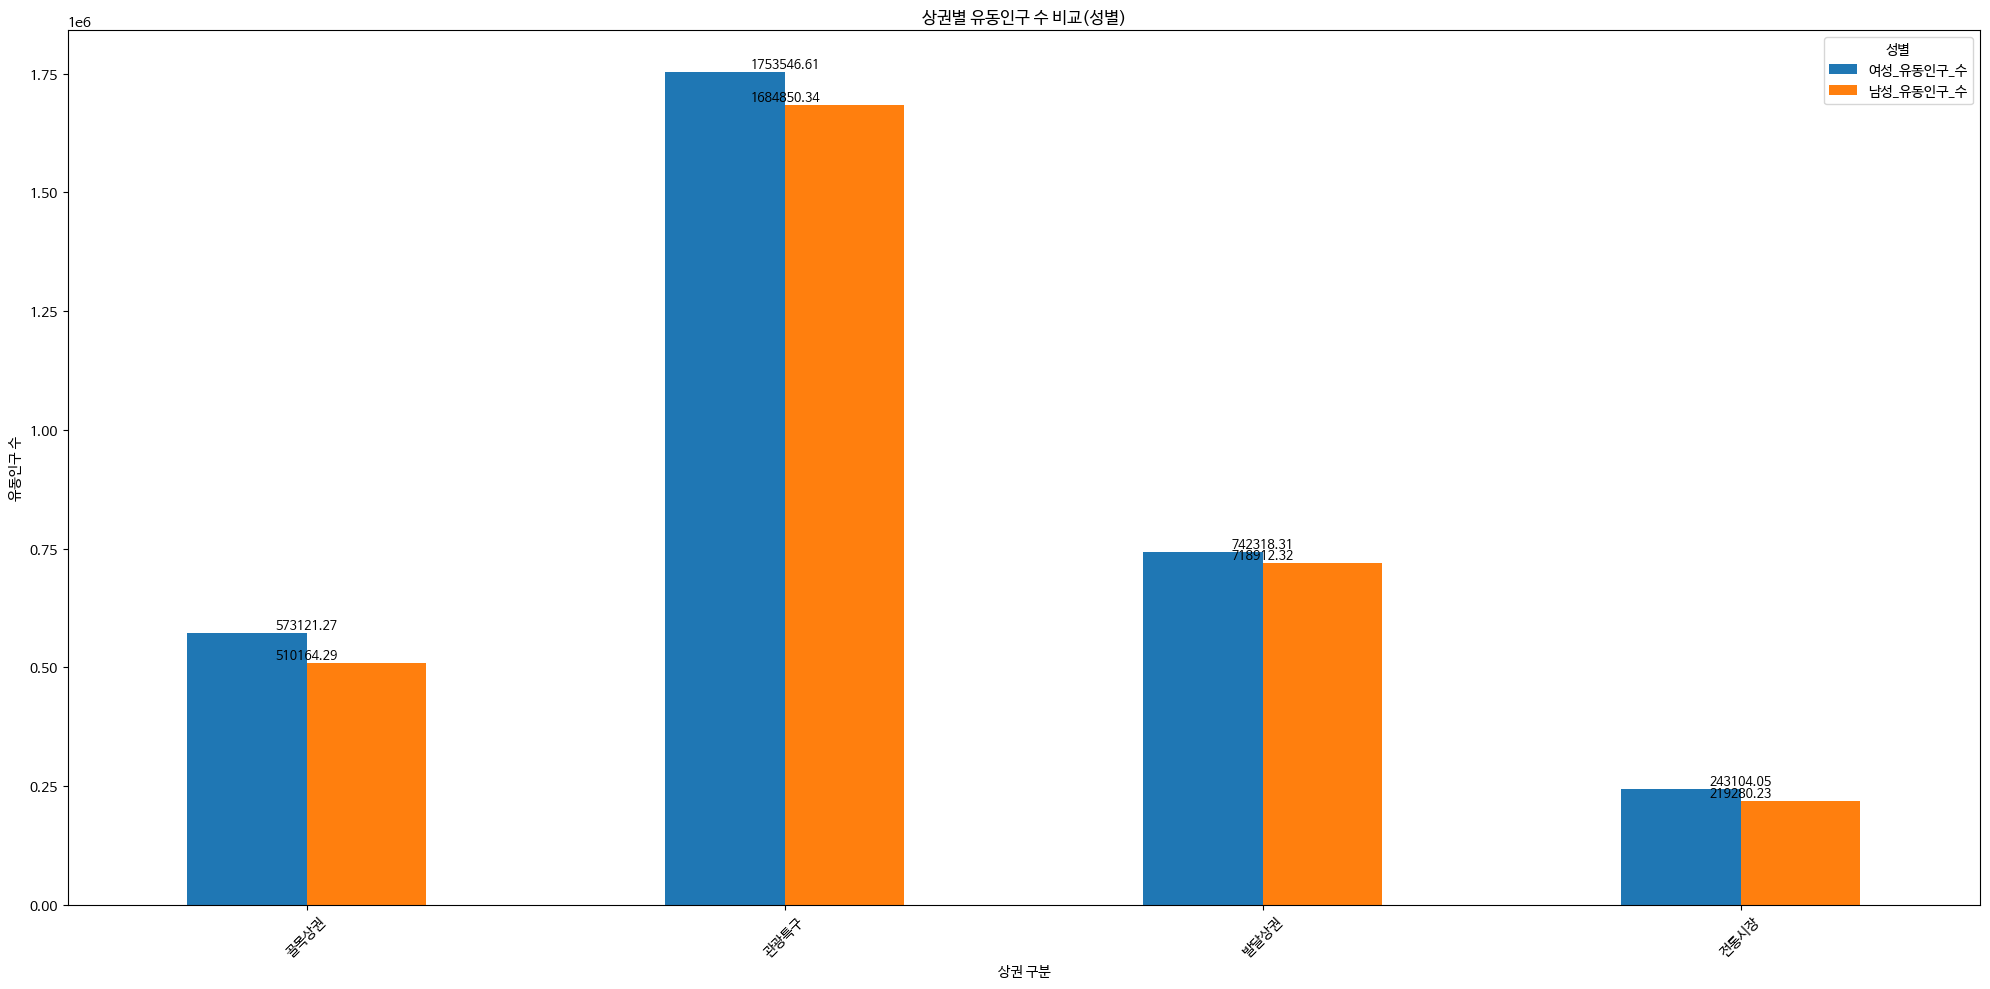

In [72]:
# '상권_구분_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 평균 계산
# 성별을 기준으로 상권별로 유동인구수를 비교함, 여성이 전반적으로 많을 것으로 생각하였으나 아니였음.
grouped_data = dataset.groupby('상권_구분_코드_명')[['여성_유동인구_수', '남성_유동인구_수']].mean()

# 그래프 그리기
grouped_data.plot(kind='bar', figsize=(20, 10))
plt.title('상권별 유동인구 수 비교(성별)')
plt.xlabel('상권 구분')
plt.ylabel('유동인구 수')
plt.xticks(rotation=45)
plt.legend(title='성별', bbox_to_anchor=(1, 1))

# 각 막대 위에 값(유동인구 수) 추가
for index, value in enumerate(grouped_data.values):
    plt.text(index, value[0], str(round(value[0], 2)), ha='center', va='bottom', fontsize=9, color='black')
    plt.text(index, value[1], str(round(value[1], 2)), ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

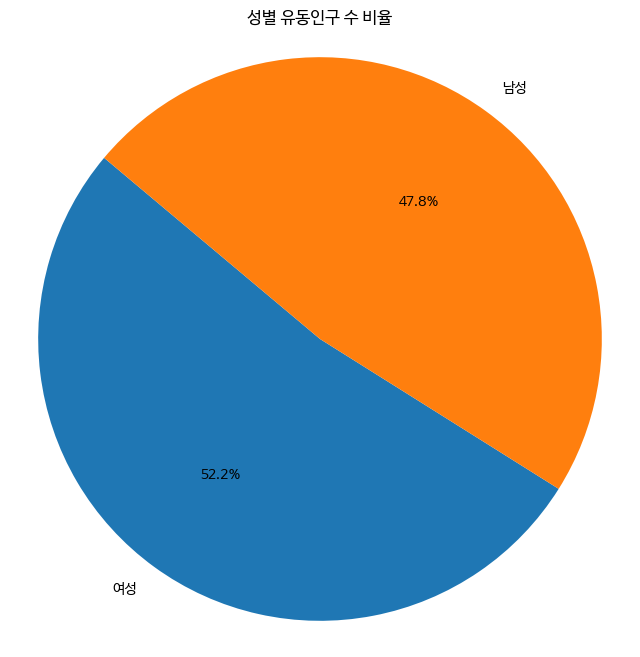

In [73]:
# 각 성별 별 유동인구 수의 총합 계산
# 성별을 기준으로 유동인구수의 비율을 계산함.
total_woman_population = dataset['여성_유동인구_수'].sum()
total_man_population = dataset['남성_유동인구_수'].sum()

# 원그래프를 그리기 위한 데이터 준비
labels = ['여성', '남성']
sizes = [total_woman_population, total_man_population]

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.title('성별 유동인구 수 비율')
plt.show()

In [74]:
# 남성과 여성의 비율이 거의 비슷하였기 때문에 차이가 20% 이상의 차이가 나는 상권을 기준으로 몇명이 많은지 알아봄.
# '상권_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 남성과 여성의 인구 수 평균 계산
grouped_data = dataset.groupby('상권_코드_명')[['남성_유동인구_수', '여성_유동인구_수']].mean()

# 남성과 여성의 인구 수의 차이 계산
grouped_data['인구_차이'] = abs(grouped_data['남성_유동인구_수'] - grouped_data['여성_유동인구_수'])

# 남성과 여성의 인구 수 차이가 20% 이상인 경우 필터링
significant_difference = grouped_data[grouped_data['인구_차이'] / grouped_data[['남성_유동인구_수', '여성_유동인구_수']].max(axis=1) >= 0.2]

# 결과 출력
for idx, row in significant_difference.iterrows():
    if row['남성_유동인구_수'] > row['여성_유동인구_수']:
        print(f"{idx} 상권에서 남성 인구가 여성 인구보다 {row['인구_차이']}만큼 많습니다.")
    else:
        print(f"{idx} 상권에서 여성 인구가 남성 인구보다 {row['인구_차이']}만큼 많습니다.")


4.19민주묘지역 2번 상권에서 여성 인구가 남성 인구보다 83871.66162570892만큼 많습니다.
G타워 상권에서 남성 인구가 여성 인구보다 49178.65862708722만큼 많습니다.
가리봉시장 상권에서 남성 인구가 여성 인구보다 14134.741007194243만큼 많습니다.
가산디지털단지 상권에서 남성 인구가 여성 인구보다 182017.2709973753만큼 많습니다.
가산디지털단지역 1번 출입구 상권에서 남성 인구가 여성 인구보다 39226.64719626168만큼 많습니다.
가오리역 2번 상권에서 여성 인구가 남성 인구보다 84138.026446281만큼 많습니다.
강북문화예술회관 상권에서 여성 인구가 남성 인구보다 230693.26963657676만큼 많습니다.
경의중앙 신촌역 상권에서 여성 인구가 남성 인구보다 127320.94539781587만큼 많습니다.
경희대학교(경희대) 상권에서 여성 인구가 남성 인구보다 132126.0855172414만큼 많습니다.
고속터미널(고속터미널역) 상권에서 여성 인구가 남성 인구보다 64281.30726698262만큼 많습니다.
관악해태어린이공원 상권에서 남성 인구가 여성 인구보다 220484.6441605839만큼 많습니다.
광장시장(광장전통시장) 상권에서 남성 인구가 여성 인구보다 79697.00511508953만큼 많습니다.
구로디지털단지 상권에서 남성 인구가 여성 인구보다 96712.33991537377만큼 많습니다.
구립대학경로당(관악산샘말공원) 상권에서 남성 인구가 여성 인구보다 906280.3992094861만큼 많습니다.
구반포역 상권에서 여성 인구가 남성 인구보다 10557.917582417576만큼 많습니다.
구산보건지소 상권에서 여성 인구가 남성 인구보다 256592.69074492098만큼 많습니다.
구산역 상권에서 여성 인구가 남성 인구보다 71223.57472527472만큼 많습니다.
구산역 1번 상권에서 여성 인구가 남성 인구보다 244375.5299586777만큼 많습니다.


In [75]:
# 남성과 여성의 비율이 거의 비슷하였기 때문에 차이가 20% 이상의 차이가 나는 상권을 기준으로 어떠한 상권구분에 속하며, 어떠한 상권이고 이는 어떠한 성별이 몇 % 더 많은지 나타냄
# 이를 통해 남성과 여성의 상권 사용이 다른 곳?을 알수 있음?
# '상권_코드_명' 및 '상권_구분_코드_명'을 기준으로 그룹화하고 각 그룹에 대한 남성과 여성의 인구 수 평균 계산
grouped_data = dataset.groupby(['상권_코드_명', '상권_구분_코드_명'])[['남성_유동인구_수', '여성_유동인구_수']].mean()

# 남성과 여성의 인구 수 비율 차이 계산
grouped_data['인구_비율_차이'] = abs((grouped_data['남성_유동인구_수'] - grouped_data['여성_유동인구_수']) / ((grouped_data['남성_유동인구_수'] + grouped_data['여성_유동인구_수']) / 2)) * 100

# 남성과 여성의 인구 수 비율 차이가 20% 이상인 경우 필터링
significant_difference = grouped_data[grouped_data['인구_비율_차이'] >= 20]

# 결과 출력
for idx, row in significant_difference.iterrows():
    if row['남성_유동인구_수'] > row['여성_유동인구_수']:
        print(f"{idx[0]} 상권은 '{idx[1]}'에 속하며, 남성이 여성보다 {row['인구_비율_차이']:.2f}% 더 많습니다.")
    else:
        print(f"{idx[0]} 상권은 '{idx[1]}'에 속하며, 여성이 남성보다 {row['인구_비율_차이']:.2f}% 더 많습니다.")

# 남성과 여성이 더 많은 '상권_구분_코드_명' 출력
max_male = grouped_data.groupby('상권_구분_코드_명')['남성_유동인구_수'].sum().idxmax()
max_female = grouped_data.groupby('상권_구분_코드_명')['여성_유동인구_수'].sum().idxmax()
print(f"남성이 가장 많은 상권_구분_코드_명: {max_male}")
print(f"여성이 가장 많은 상권_구분_코드_명: {max_female}")


4.19민주묘지역 2번 상권은 '골목상권'에 속하며, 여성이 남성보다 29.68% 더 많습니다.
G타워 상권은 '골목상권'에 속하며, 남성이 여성보다 30.07% 더 많습니다.
KB국민은행 망원동지점 상권은 '골목상권'에 속하며, 여성이 남성보다 21.10% 더 많습니다.
가리봉시장 상권은 '전통시장'에 속하며, 남성이 여성보다 26.54% 더 많습니다.
가리봉파출소 상권은 '골목상권'에 속하며, 남성이 여성보다 20.34% 더 많습니다.
가산디지털단지 상권은 '발달상권'에 속하며, 남성이 여성보다 33.58% 더 많습니다.
가산디지털단지역 1번 출입구 상권은 '골목상권'에 속하며, 남성이 여성보다 25.49% 더 많습니다.
가양역 10번 상권은 '골목상권'에 속하며, 여성이 남성보다 20.47% 더 많습니다.
가오리역 2번 상권은 '골목상권'에 속하며, 여성이 남성보다 24.09% 더 많습니다.
강남구보훈회관 상권은 '골목상권'에 속하며, 여성이 남성보다 20.49% 더 많습니다.
강남구청(청담역_8번, 강남세무서) 상권은 '발달상권'에 속하며, 여성이 남성보다 20.66% 더 많습니다.
강북문화예술회관 상권은 '골목상권'에 속하며, 여성이 남성보다 23.74% 더 많습니다.
강북문화정보도서관 상권은 '골목상권'에 속하며, 여성이 남성보다 20.22% 더 많습니다.
경의중앙 신촌역 상권은 '골목상권'에 속하며, 여성이 남성보다 40.42% 더 많습니다.
경희대학교(경희대) 상권은 '발달상권'에 속하며, 여성이 남성보다 25.24% 더 많습니다.
고속터미널(고속터미널역) 상권은 '발달상권'에 속하며, 여성이 남성보다 23.97% 더 많습니다.
관악해태어린이공원 상권은 '골목상권'에 속하며, 남성이 여성보다 39.93% 더 많습니다.
광장시장(광장전통시장) 상권은 '전통시장'에 속하며, 남성이 여성보다 28.71% 더 많습니다.
구로디지털단지 상권은 '발달상권'에 속하며, 남성이 여성보다 26.42% 더 많습니다.
구립대학경로당(관악산샘말공원) 상권은 '골목상권

In [76]:
# 각 '상권_구분_코드_명'에 대한 남성과 여성의 유동인구 수의 총합 계산
total_male_population = grouped_data.groupby('상권_구분_코드_명')['남성_유동인구_수'].sum()
total_female_population = grouped_data.groupby('상권_구분_코드_명')['여성_유동인구_수'].sum()

# 남성과 여성이 더 많은 '상권_구분_코드_명' 출력
for category in total_male_population.index:
    male_population_ratio = total_male_population[category] / (total_male_population[category] + total_female_population[category]) * 100
    female_population_ratio = total_female_population[category] / (total_male_population[category] + total_female_population[category]) * 100

    if male_population_ratio > female_population_ratio:
        print(f"{category}에서는 여성보다 남성이 {male_population_ratio:.2f}% 더 많습니다.")
    elif female_population_ratio > male_population_ratio:
        print(f"{category}에서는 남성보다 여성이 {female_population_ratio:.2f}% 더 많습니다.")
    else:
        print(f"{category}에서는 남성과 여성의 비율이 같습니다.")


골목상권에서는 남성보다 여성이 52.88% 더 많습니다.
관광특구에서는 여성보다 남성이 51.03% 더 많습니다.
발달상권에서는 남성보다 여성이 50.88% 더 많습니다.
전통시장에서는 남성보다 여성이 52.41% 더 많습니다.


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208030 entries, 0 to 1208029
Data columns (total 91 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1208030 non-null  int64  
 1   기준_년분기_코드         1208030 non-null  int64  
 2   상권_구분_코드          1208030 non-null  object 
 3   상권_구분_코드_명        1208030 non-null  object 
 4   상권_코드             1208030 non-null  int64  
 5   상권_코드_명           1208030 non-null  object 
 6   서비스_업종_코드         1207982 non-null  object 
 7   서비스_업종_코드_명       1207982 non-null  object 
 8   당월_매출_금액          323792 non-null   float64
 9   당월_매출_건수          323792 non-null   float64
 10  주중_매출_금액          323792 non-null   float64
 11  주말_매출_금액          323792 non-null   float64
 12  월요일_매출_금액         323792 non-null   float64
 13  화요일_매출_금액         323792 non-null   float64
 14  수요일_매출_금액         323792 non-null   float64
 15  목요일_매출_금액         323792 non-null   float64
 16  

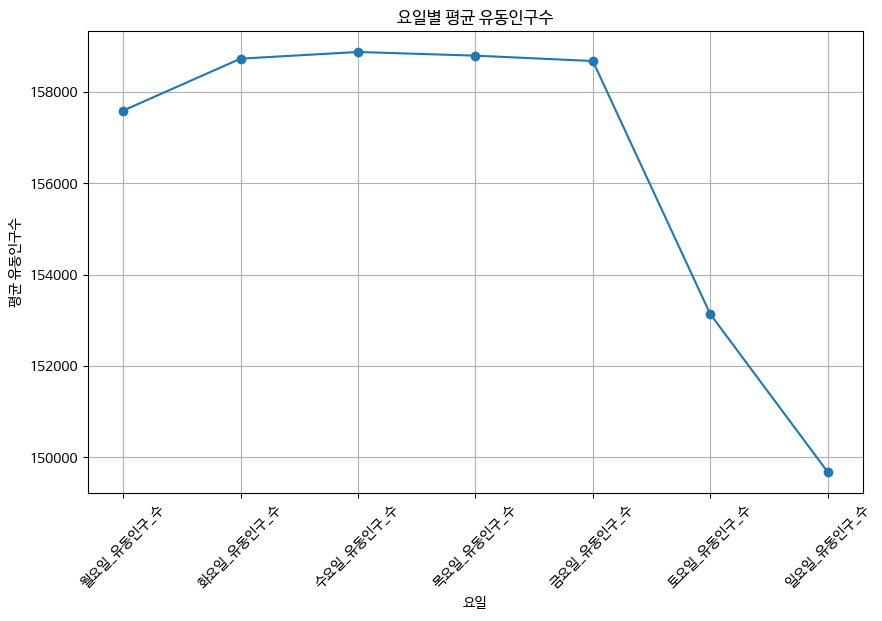

In [78]:
# 요일별 유동인구수 컬럼 선택
weekday_columns = ['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']

# 각 요일별 유동인구수의 합 계산
weekday_total = dataset[weekday_columns].sum()

# 각 요일별 유동인구수의 합을 요일 수로 나누어 평균 계산
weekday_avg = weekday_total / len(dataset)

# 꺽은선 그래프로 요일별 평균 유동인구수를 시각화
plt.figure(figsize=(10, 6))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o', linestyle='-')
plt.title('요일별 평균 유동인구수')
plt.xlabel('요일')
plt.ylabel('평균 유동인구수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 요일별 유동인구수를 통해 주말이 아닌 평일이 유동인구수가 더 많으며, 매출이 더 높을 것으로 예상된다?
# 출퇴근의 영향이 있을것?

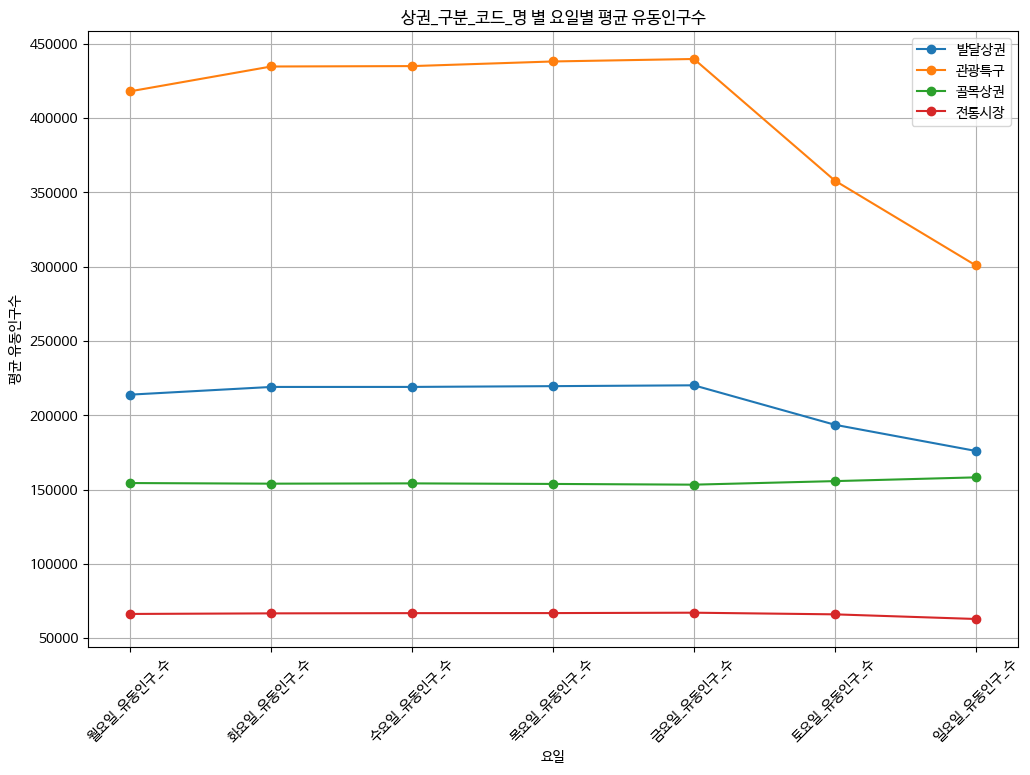

In [79]:
# 요일별 유동인구수 컬럼 선택
weekday_columns = ['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']

# '상권_구분_코드_명'마다 꺽은선 그래프 그리기
plt.figure(figsize=(12, 8))
for group_code in dataset['상권_구분_코드_명'].unique():
    subset = dataset[dataset['상권_구분_코드_명'] == group_code]
    weekday_total = subset[weekday_columns].sum()
    weekday_avg = weekday_total / len(subset)
    plt.plot(weekday_avg.index, weekday_avg.values, marker='o', linestyle='-', label=group_code)

plt.title('상권_구분_코드_명 별 요일별 평균 유동인구수')
plt.xlabel('요일')
plt.ylabel('평균 유동인구수')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
#상권 구분별로 유동인구 수를 시각화하여 어떤 상권구분이 매출이 높을지를 예상 할 수 있다.

In [ ]:
dataset.info()

상권_코드_명
용산전자상가(용산역)    1.654375e+13
노량진역(노량진)      1.261580e+13
가산디지털단지        1.113445e+13
가락시장           5.711910e+12
강남역            5.545184e+12
                   ...     
이태원역 북측        0.000000e+00
덕산중학교          0.000000e+00
영동대교남단         0.000000e+00
필동 골목형상점가      0.000000e+00
동덕여대           0.000000e+00
Name: 당월_매출_금액, Length: 1651, dtype: float64
시간대_00~06_매출_금액    8.432313e+12
시간대_06~11_매출_금액    3.287296e+13
시간대_11~14_매출_금액    7.835759e+13
시간대_14~17_매출_금액    8.270756e+13
시간대_17~21_매출_금액    8.626417e+13
시간대_21~24_매출_금액    2.274121e+13
dtype: float64
남성_매출_금액    1.415925e+14
여성_매출_금액    1.347199e+14
dtype: float64
청년층_유동인구_수          4.743665e+11
중년층_유동인구_수          4.021553e+11
연령대_60_이상_유동인구_수    2.812059e+11
dtype: float64


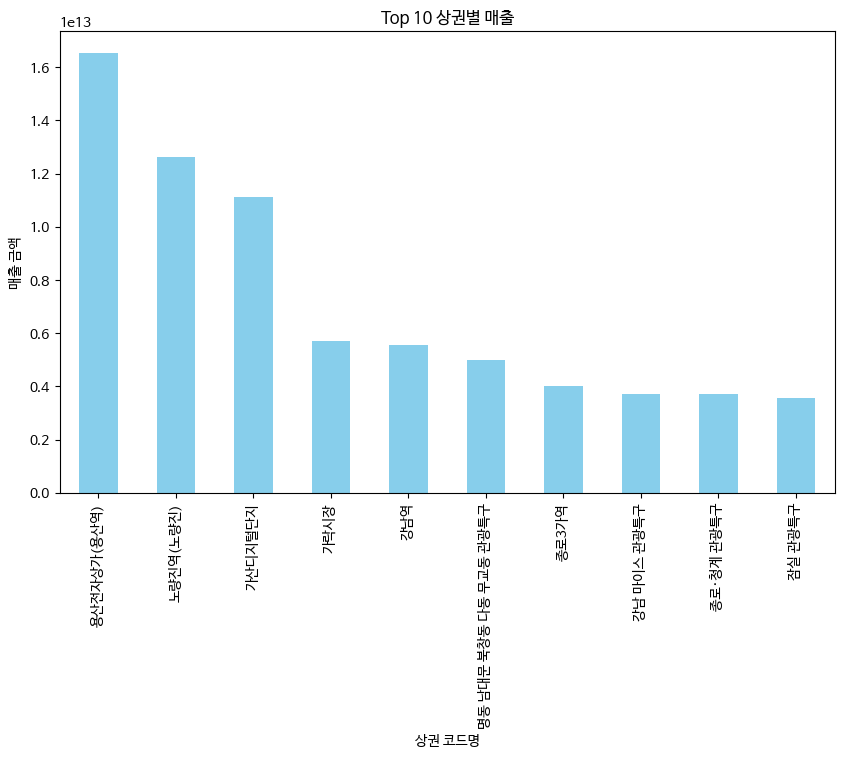

In [80]:
# 많은 순으로 정렬함.
# 상권별 매출 분석
sales_by_district = dataset.groupby('상권_코드_명')['당월_매출_금액'].sum().sort_values(ascending=False)
print(sales_by_district)

# 시간대별 매출 분석
time_columns = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
                '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
sales_by_time = dataset[time_columns].sum()
print(sales_by_time)

# 성별 매출 분석
gender_columns = ['남성_매출_금액', '여성_매출_금액']
sales_by_gender = dataset[gender_columns].sum()
print(sales_by_gender)

# 연령대별 매출 분석
age_columns = ['청년층_유동인구_수', '중년층_유동인구_수', '연령대_60_이상_유동인구_수']
sales_by_age = dataset[age_columns].sum()
print(sales_by_age)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sales_by_district.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 상권별 매출')
plt.xlabel('상권 코드명')
plt.ylabel('매출 금액')
plt.xticks(rotation=90)
plt.show()


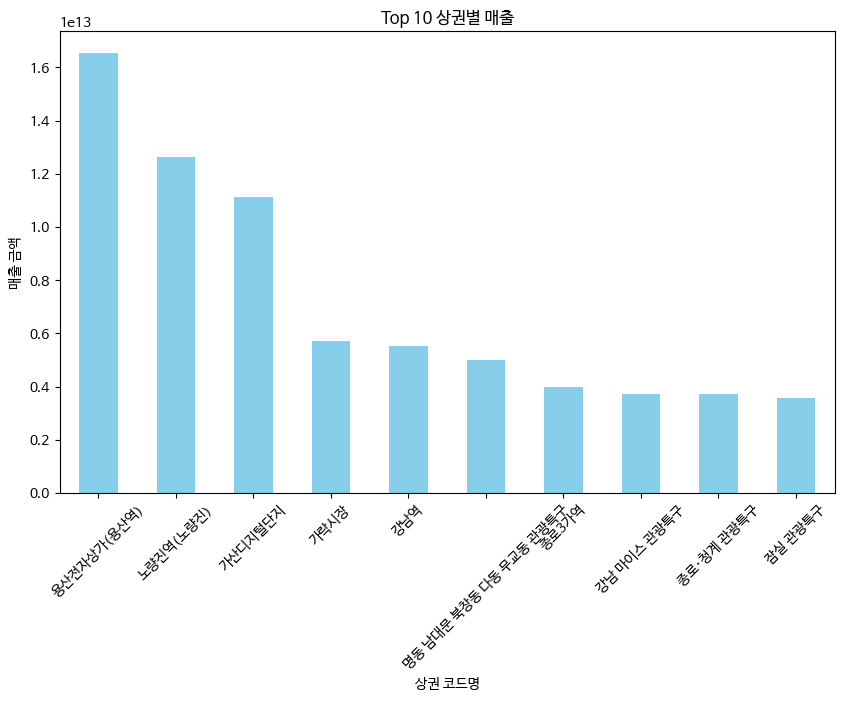

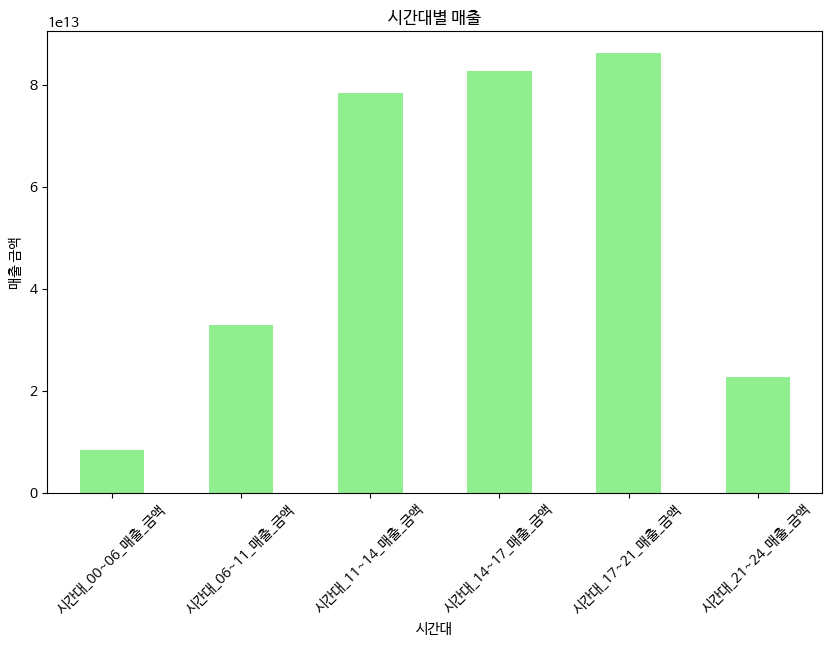

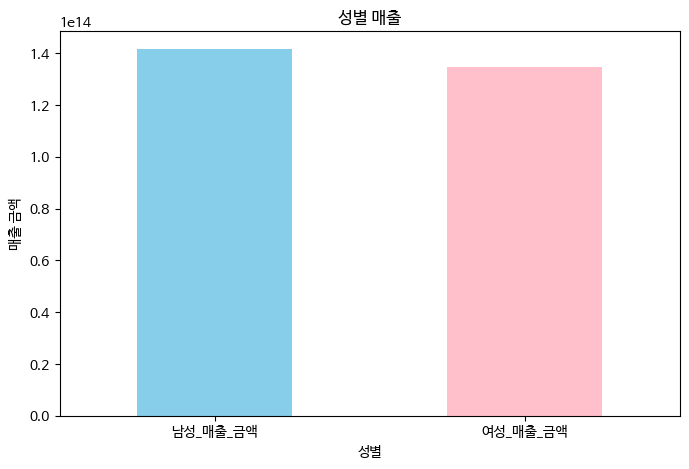

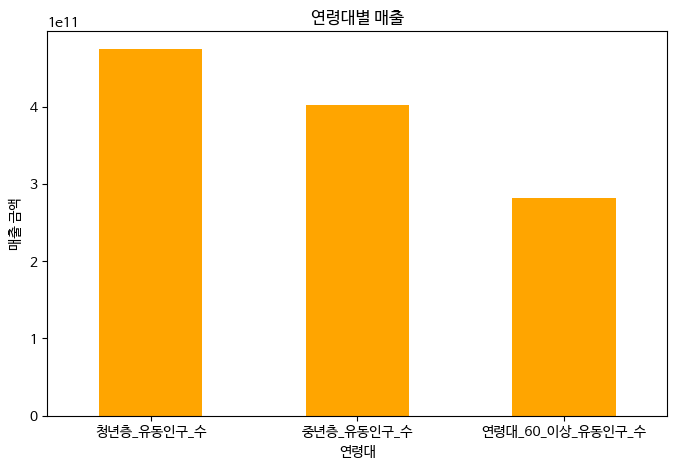

In [81]:
import matplotlib.pyplot as plt

# 상권별 매출 그래프
plt.figure(figsize=(10, 6))
sales_by_district.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 상권별 매출')
plt.xlabel('상권 코드명')
plt.ylabel('매출 금액')
plt.xticks(rotation=45)
plt.show()

# 시간대별 매출 그래프
plt.figure(figsize=(10, 6))
sales_by_time.plot(kind='bar', color='lightgreen')
plt.title('시간대별 매출')
plt.xlabel('시간대')
plt.ylabel('매출 금액')
plt.xticks(rotation=45)
plt.show()

# 성별 매출 그래프
plt.figure(figsize=(8, 5))
sales_by_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('성별 매출')
plt.xlabel('성별')
plt.ylabel('매출 금액')
plt.xticks(rotation=0)
plt.show()

# 연령대별 매출 그래프
plt.figure(figsize=(8, 5))
sales_by_age.plot(kind='bar', color='orange')
plt.title('연령대별 매출')
plt.xlabel('연령대')
plt.ylabel('매출 금액')
plt.xticks(rotation=0)
plt.show()


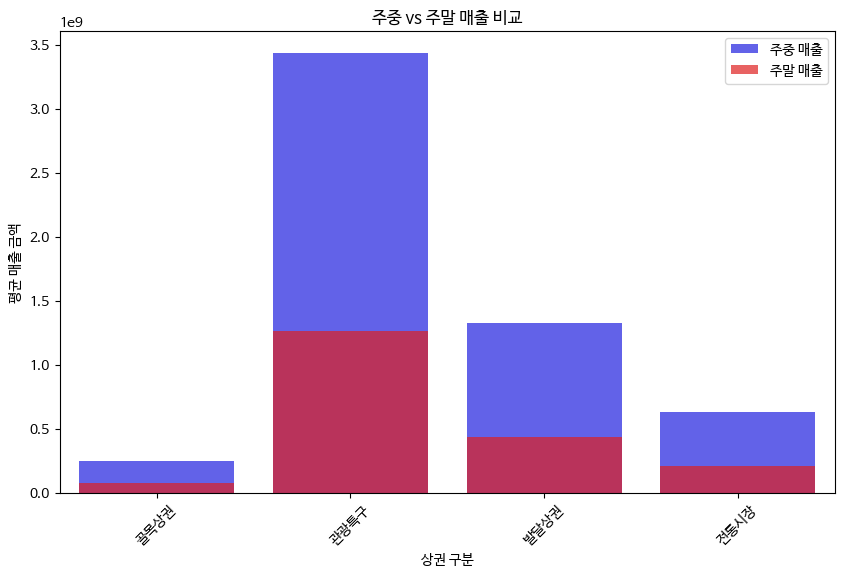

In [82]:
# 매출 패턴 분석 예시: 주중/주말 매출 비교
weekday_sales = dataset.groupby('상권_구분_코드_명')['주중_매출_금액'].mean()
weekend_sales = dataset.groupby('상권_구분_코드_명')['주말_매출_금액'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, color='blue', alpha=0.7, label='주중 매출')
sns.barplot(x=weekend_sales.index, y=weekend_sales.values, color='red', alpha=0.7, label='주말 매출')
plt.xticks(rotation=45)
plt.xlabel('상권 구분')
plt.ylabel('평균 매출 금액')
plt.title('주중 vs 주말 매출 비교')
plt.legend()
plt.show()

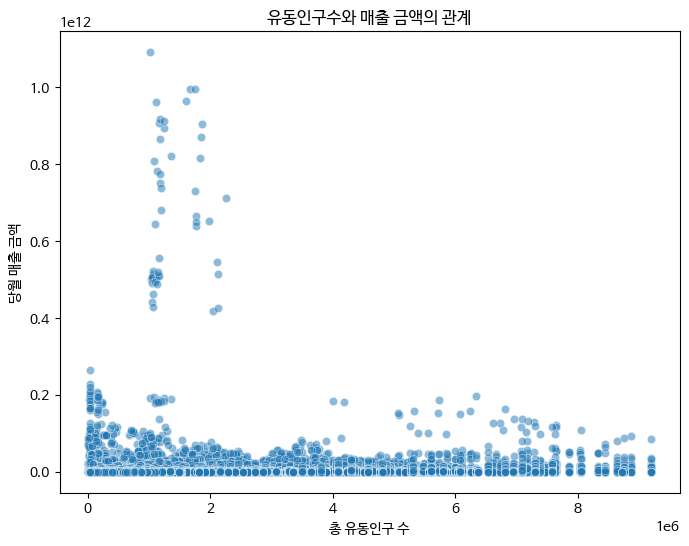

유동인구수와 매출 금액의 상관 계수: 0.0346476602809802


In [83]:
# 유동인구와 매출 간의 관계 분석: 유동인구수와 당월 매출 금액의 상관 관계 # 회귀로 바꿔보기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='총_유동인구_수', y='당월_매출_금액', alpha=0.5)
plt.xlabel('총 유동인구 수')
plt.ylabel('당월 매출 금액')
plt.title('유동인구수와 매출 금액의 관계')
plt.show()

# 상관 계수 확인
correlation = dataset['총_유동인구_수'].corr(dataset['당월_매출_금액'])
print(f"유동인구수와 매출 금액의 상관 계수: {correlation}")


In [84]:
# 상권 구분 코드명별로 데이터 분할
grouped_data = dataset.groupby('상권_구분_코드_명')

# 각 상권에 대한 유동인구수와 매출 금액의 상관 계수 계산
correlation_results = {}
for group, data in grouped_data:
    correlation = data['총_유동인구_수'].corr(data['당월_매출_금액'])
    correlation_results[group] = correlation

# 결과 출력
for group, correlation in correlation_results.items():
    print(f"{group} 상권의 유동인구수와 매출 금액의 상관 계수: {correlation}")

골목상권 상권의 유동인구수와 매출 금액의 상관 계수: 0.013978168041579565
관광특구 상권의 유동인구수와 매출 금액의 상관 계수: 0.01799961112828116
발달상권 상권의 유동인구수와 매출 금액의 상관 계수: 0.02603781684496647
전통시장 상권의 유동인구수와 매출 금액의 상관 계수: 0.010210549233900114


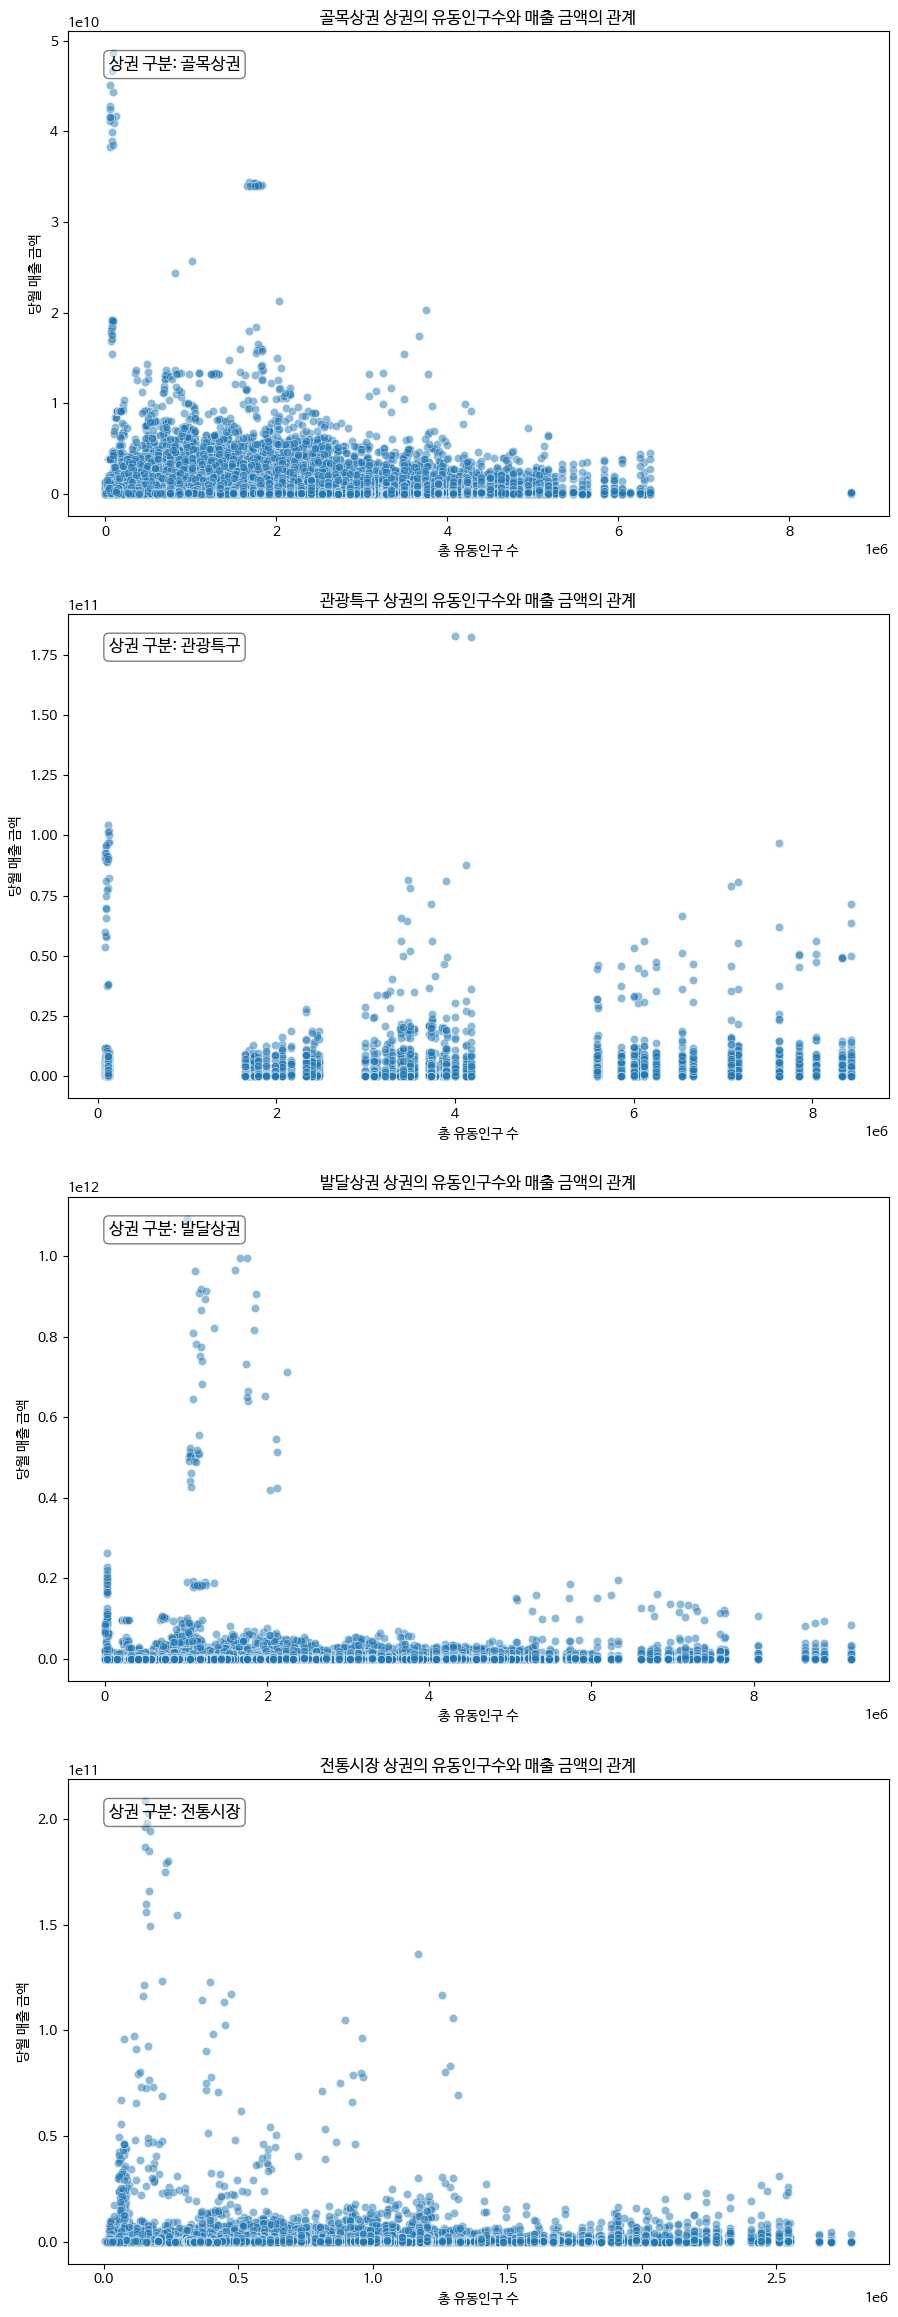

In [85]:
# 시각화를 위한 준비
fig, axes = plt.subplots(nrows=len(correlation_results), figsize=(10, 6 * len(correlation_results)))
fig.tight_layout(pad=5.0)

# 상권별로 산점도 그리기
for idx, (group, data) in enumerate(grouped_data):
    ax = axes[idx]
    sns.scatterplot(data=data, x='총_유동인구_수', y='당월_매출_금액', ax=ax, alpha=0.5)
    ax.set_xlabel('총 유동인구 수')
    ax.set_ylabel('당월 매출 금액')
    ax.set_title(f'{group} 상권의 유동인구수와 매출 금액의 관계')

    # 상권 구분 코드명 표시
    ax.text(0.05, 0.95, f'상권 구분: {group}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()


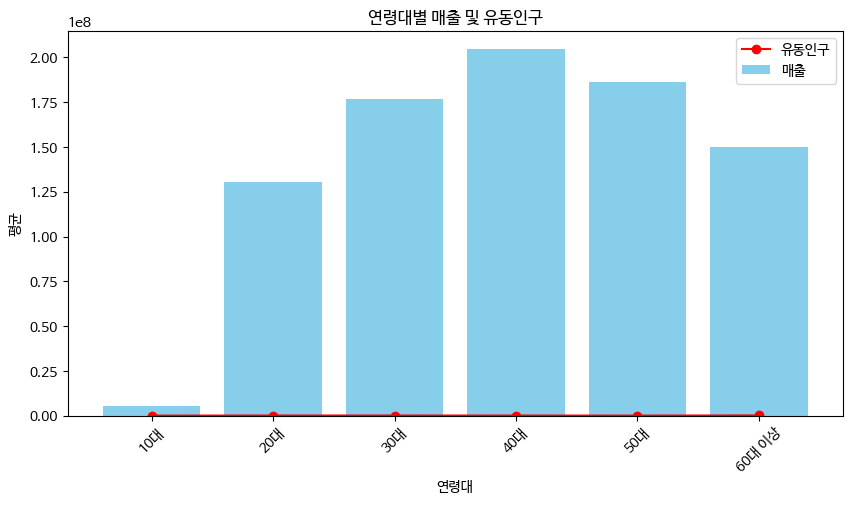

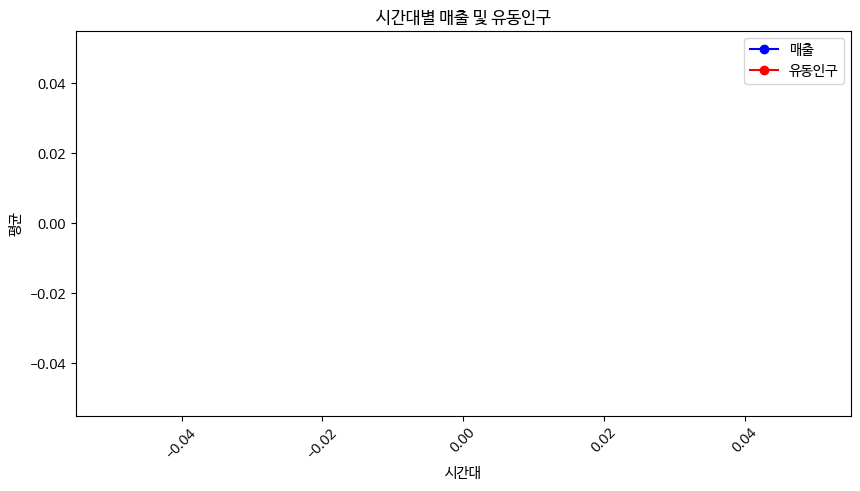

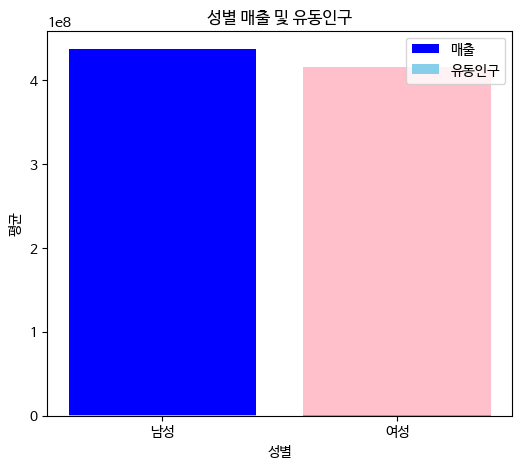

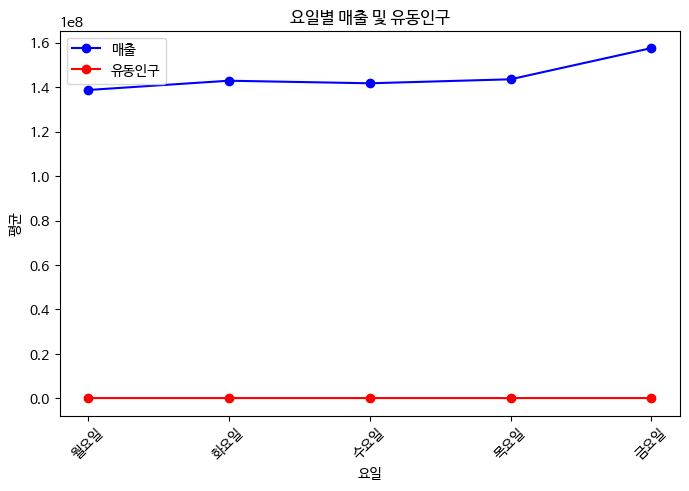

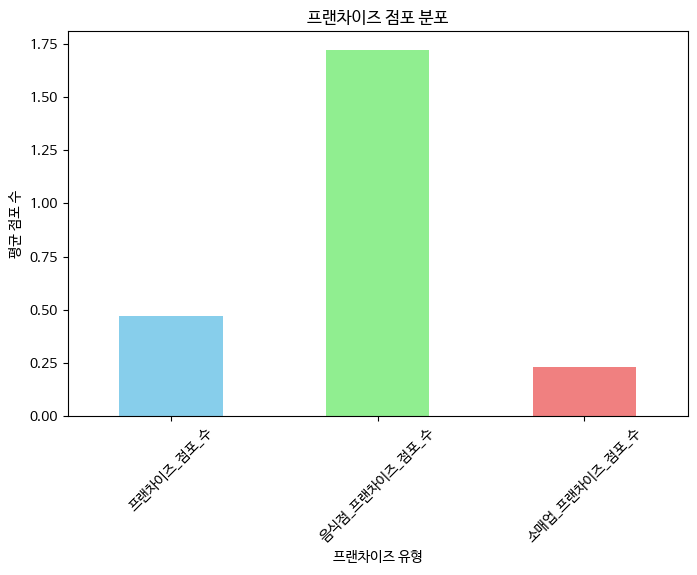

In [86]:
# 연령대별 매출 및 유동인구 분석
age_groups = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
age_sales = dataset[age_groups].mean()
age_population = dataset[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(['10대', '20대', '30대', '40대', '50대', '60대 이상'], age_sales, color='skyblue', label='매출')
plt.plot(['10대', '20대', '30대', '40대', '50대', '60대 이상'], age_population, marker='o', color='red', label='유동인구')
plt.xlabel('연령대')
plt.ylabel('평균')
plt.title('연령대별 매출 및 유동인구')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 시간대별 매출 및 유동인구 분석
time_sales = dataset.filter(like='시간대_매출_금액').mean()
time_population = dataset.filter(like='시간대_유동인구_수').mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(time_sales.index.str.split('_').str[-1], time_sales, marker='o', color='blue', label='매출')
plt.plot(time_population.index.str.split('_').str[-1], time_population, marker='o', color='red', label='유동인구')
plt.xlabel('시간대')
plt.ylabel('평균')
plt.title('시간대별 매출 및 유동인구')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 성별 매출 및 유동인구 분석
gender_sales = dataset[['남성_매출_금액', '여성_매출_금액']].mean()
gender_population = dataset[['남성_유동인구_수', '여성_유동인구_수']].mean()

# 시각화
plt.figure(figsize=(6, 5))
plt.bar(['남성', '여성'], gender_sales, color=['blue', 'pink'], label='매출')
plt.bar(['남성', '여성'], gender_population, color=['skyblue', 'lightcoral'], label='유동인구')
plt.xlabel('성별')
plt.ylabel('평균')
plt.title('성별 매출 및 유동인구')
plt.legend()
plt.show()

# 요일별 매출 및 유동인구 분석
weekday_sales = dataset[['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액']].mean()
weekday_population = dataset[['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수']].mean()

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(weekday_sales.index.str.split('_').str[0], weekday_sales, marker='o', color='blue', label='매출')
plt.plot(weekday_population.index.str.split('_').str[0], weekday_population, marker='o', color='red', label='유동인구')
plt.xlabel('요일')
plt.ylabel('평균')
plt.title('요일별 매출 및 유동인구')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 프랜차이즈 점포 분포 분석 (예시)
franchise_counts = dataset[['프랜차이즈_점포_수', '음식점_프랜차이즈_점포_수', '소매업_프랜차이즈_점포_수']].mean()

# 시각화
franchise_counts.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('프랜차이즈 유형')
plt.ylabel('평균 점포 수')
plt.title('프랜차이즈 점포 분포')
plt.xticks(rotation=45)
plt.show()
